# Prédiction du prix des maisons par régression avec des réseaux de neurones

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from keras.optimizers import SGD
from keras import backend
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

Using TensorFlow backend.


In [2]:
def Difference(prediction, prix_reel):
    L=np.zeros(len(Y_test))
    for i in range(len(prediction)):
        L[i]=np.abs(prediction[i]-prix_reel[i])
    return L

## Exploration des données et suppression des données non numériques
Dans cette première phase, on va juste observer à quoi ressemblent nos données, le nombre de features...

In [3]:
df = pd.read_csv('data/dataset.csv', delimiter=';')
pd.set_option('display.max_columns', None)

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000000
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000000
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000000
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400
2917,2918,85,RL

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180052.854647
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,57381.565721
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,154795.084126
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,176734.841494
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,191895.744157
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


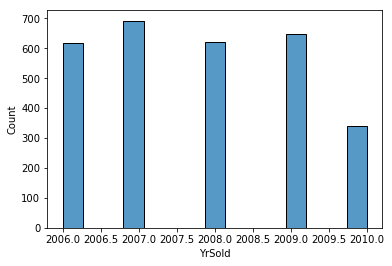

In [6]:
sns.histplot(data=df, x="YrSold")

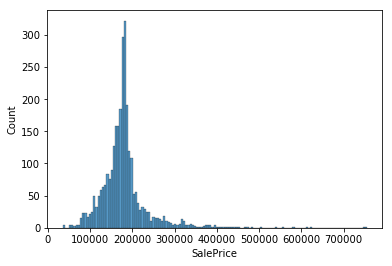

In [7]:
sns.histplot(data=df, x="SalePrice")

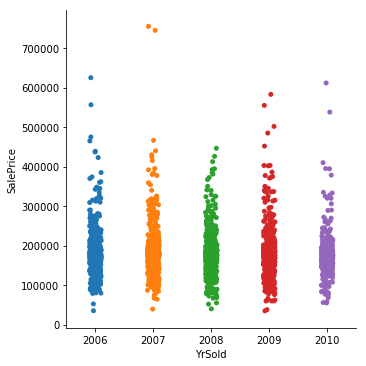

In [8]:
sns.catplot(data=df, x="YrSold", y="SalePrice")

On aurait pu penser que le prix des maisons vendues baisse entre 2006 et 2010 du fait de la crise des subprimes, mais finalement il n'en n'est rien...

## Nettoyage des données, séparation input/output et normalisation
Avant de pouvoir travailler, il faut déterminer la quantité de données manquantes, pour chaque feature de nos données

In [9]:
# Il faut déterminer la quantité de données manquantes, pour chaque feature de nos données
def donneesManquantes(dataframe):
    total = dataframe.isnull().sum().sort_values(ascending=False)
    pourcent = (dataframe.isnull().sum()/dataframe.isnull().count()).sort_values(ascending=False)
    donnees_manquantes = pd.concat([total, pourcent], axis=1, keys=['Nombre de données manquantes', 'Pourcentage de donnees manquantes'])
    return donnees_manquantes.head(30)
donneesManquantes(df)

,Nombre de données manquantes,Pourcentage de donnees manquantes
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471


On voit que les quatre premières features du tableau ont plus de 80% de données manquantes. En se basant sur les conseils du livre "Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow", on va supprimer cette feature. Quant au reste des données manquantes, on va remplacer par la médiane ou le mode selon qu'il s'agisse de données numériques ou non.


In [10]:
#Suppression des cinq features les moins renseignées
df = df.drop(["PoolQC"], axis=1)
df = df.drop(["MiscFeature"], axis=1)
df = df.drop(["Alley"], axis=1)
df = df.drop(["Fence"], axis=1)

In [11]:
donneesManquantes(df)

,Nombre de données manquantes,Pourcentage de donnees manquantes
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageType,157,0.053786
BsmtCond,82,0.028092
BsmtExposure,82,0.028092
BsmtQual,81,0.027749


In [12]:
def remplacerParMediane(feature):
    mediane = feature.median()
    for i in range(len(feature)):
        if math.isnan(feature[i])==True:
            feature[i]=mediane
    return

remplacerParMediane(df['LotFrontage'])
remplacerParMediane(df['GarageYrBlt'])
remplacerParMediane(df['MasVnrArea'])
remplacerParMediane(df['BsmtHalfBath'])
remplacerParMediane(df['BsmtFullBath'])
remplacerParMediane(df['BsmtFinSF2'])
remplacerParMediane(df['GarageCars'])
remplacerParMediane(df['GarageArea'])
remplacerParMediane(df['TotalBsmtSF'])
remplacerParMediane(df['BsmtUnfSF'])
remplacerParMediane(df['BsmtFinSF1'])

/opt/anaconda3/envs/net4529/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
donneesManquantes(df)

,Nombre de données manquantes,Pourcentage de donnees manquantes
FireplaceQu,1420,0.486468
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageFinish,159,0.054471
GarageType,157,0.053786
BsmtExposure,82,0.028092
BsmtCond,82,0.028092
BsmtQual,81,0.027749
BsmtFinType2,80,0.027407
BsmtFinType1,79,0.027064


In [14]:
df["FireplaceQu"].fillna(df["FireplaceQu"].mode()[0], inplace=True)
df["GarageCond"].fillna(df["GarageCond"].mode()[0], inplace=True)
df["GarageFinish"].fillna(df["GarageFinish"].mode()[0], inplace=True)
df["GarageQual"].fillna(df["GarageQual"].mode()[0], inplace=True)
df["GarageType"].fillna(df["GarageType"].mode()[0], inplace=True)
df["BsmtExposure"].fillna(df["BsmtExposure"].mode()[0], inplace=True)
df["BsmtCond"].fillna(df["BsmtCond"].mode()[0], inplace=True)
df["BsmtQual"].fillna(df["BsmtQual"].mode()[0], inplace=True)
df["BsmtFinType2"].fillna(df["BsmtFinType2"].mode()[0], inplace=True)
df["BsmtFinType1"].fillna(df["BsmtFinType1"].mode()[0], inplace=True)
df["MasVnrType"].fillna(df["MasVnrType"].mode()[0], inplace=True)
df["MSZoning"].fillna(df["MSZoning"].mode()[0], inplace=True)
df["Utilities"].fillna(df["Utilities"].mode()[0], inplace=True)
df["Functional"].fillna(df["Functional"].mode()[0], inplace=True)
df["Exterior1st"].fillna(df["Exterior1st"].mode()[0], inplace=True)
df["Electrical"].fillna(df["Electrical"].mode()[0], inplace=True)
df["KitchenQual"].fillna(df["KitchenQual"].mode()[0], inplace=True)
df["Exterior2nd"].fillna(df["Exterior2nd"].mode()[0], inplace=True)
df["SaleType"].fillna(df["SaleType"].mode()[0], inplace=True)

In [15]:
df.isnull().sum().max() #Pour connaitre le nombre de données manquantes

0

In [16]:
def listeColonnes(df):
    return list(df.columns)
listeColonnes(df)

def colonnesNonNumeriques(df):
    categoricalColumns = listeColonnes(df)
    for i in range(len(categoricalColumns)):
        if df[listeColonnes(df)[i]].dtype == 'float64':
            categoricalColumns.remove(listeColonnes(df)[i])
        elif df[listeColonnes(df)[i]].dtype == 'int64':
            categoricalColumns.remove(listeColonnes(df)[i])
    return categoricalColumns

In [17]:
#Pour transformer les donnees non numeriques en donnees numeriques
df = pd.get_dummies(df, columns=colonnesNonNumeriques(df))

In [18]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,G

In [19]:
df = df.drop("Id", axis=1)
SalePrice = df['SalePrice']
df = df.drop("SalePrice", axis=1)
df['SalePrice'] = SalePrice
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,

In [20]:
dataset = df.values

In [21]:
X = dataset[:,0:275]
Y = dataset[:,275]

In [22]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled

array([[0.23529412, 0.15068493, 0.0334198 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.20205479, 0.03879502, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.1609589 , 0.04650728, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.4760274 , 0.08740564, ..., 0.        , 0.        ,
        0.        ],
       [0.38235294, 0.14041096, 0.04272593, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.18150685, 0.03892122, ..., 0.        , 1.        ,
        0.        ]])

In [23]:
X_train, X_valtest, Y_train, Y_valtest = train_test_split(X_scaled, Y, test_size=0.3)

In [24]:
X_val, X_test, Y_val, Y_test = train_test_split(X_valtest, Y_valtest, test_size=0.5)

In [25]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(2043, 275) (438, 275) (438, 275) (2043,) (438,) (438,)


## Modèle 1

In [26]:
model1 = Sequential([
    Dense(16, activation='relu', input_shape=(275,)),
    Dense(1, activation='linear'), 
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


On commence par un réseau simple, où on définit une première couche dense, et la couche de sortie. On souhaite prédire un prix, qui est une valeur numérique. On n'utilisera donc pas une fonction d'activation du type sigmoid, mais plutot relu ou linear. Relu a l'avantage de nous assurer de prédire des prix positifs. Par ailleurs, pour l'erreur, on pourrait utiliser un root mean square error ou un mean absolute error. L'avantage du RMSE est qu'il sanctionne plus durement les grosses erreurs que les petites erreurs. Dans un premier temps, c'est donc celui que nous retiendrons. Le RMSE n'étant pas implementé nativement sur Keras, on utilisera le code suivant trouvé sur Internet.

In [27]:
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

model1.compile(optimizer='adam',
              loss=rmse)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 2043 samples, validate on 438 samples
Epoch 1/100
2043/2043 [==============================] - 1s 672us/step - loss: 180178.1613 - val_loss: 181747.4939
Epoch 2/100
2043/2043 [==============================] - 0s 127us/step - loss: 180166.2084 - val_loss: 181732.7269
Epoch 3/100
2043/2043 [==============================] - 0s 129us/step - loss: 180147.8395 - val_loss: 181710.1810
Epoch 4/100
2043/2043 [==============================] - 0s 132us/step - loss: 180121.1383 - val_loss: 181679.3063
Epoch 5/100
2043/2043 [==============================] - 0s 133us/step - loss: 180086.3591 - val_loss: 181640.5472
Epoch 6/100
2043/2043 [==============================] - 0s 130us/step - loss: 180043.7968 - val_loss: 181594.1017
Epoch 7/100
2043/2043 [==============================] - 0s 131us/step - loss: 179993.6084 - val_loss: 181540.0634
Epoch 8/100
2043/2043 [==============================

2043/2043 [==============================] - 0s 127us/step - loss: 167270.3606 - val_loss: 168676.7745
Epoch 67/100
2043/2043 [==============================] - 0s 129us/step - loss: 166926.8975 - val_loss: 168331.4044
Epoch 68/100
2043/2043 [==============================] - 0s 143us/step - loss: 166579.7180 - val_loss: 167982.8400
Epoch 69/100
2043/2043 [==============================] - 0s 127us/step - loss: 166229.0135 - val_loss: 167630.4176
Epoch 70/100
2043/2043 [==============================] - 0s 128us/step - loss: 165874.6583 - val_loss: 167274.3629
Epoch 71/100
2043/2043 [==============================] - 0s 127us/step - loss: 165516.7053 - val_loss: 166914.6387
Epoch 72/100
2043/2043 [==============================] - 0s 128us/step - loss: 165155.1000 - val_loss: 166551.6811
Epoch 73/100
2043/2043 [==============================] - 0s 129us/step - loss: 164790.0029 - val_loss: 166184.7482
Epoch 74/100
2043/2043 [==============================] - 0s 127us/step - loss: 16442

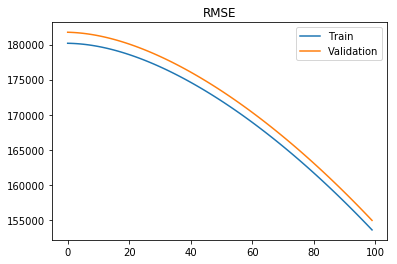

In [28]:
# Pour ce premier entraînement, on commence avec 100 épisodes.
training1 = model1.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

# Modelisation graphique de la perte et de la precision pendant l'entrainement
plt.figure()
plt.title('RMSE')
plt.plot(training1.history['loss'], label='train')
plt.plot(training1.history['val_loss'], label='val')
plt.legend(['Train', 'Validation'])
plt.show()

A l'isssue de ce premier entraînement, on a des résultats encore peu interessants, puisqu'on obtient une RMSE de plus de 155000. Deux options : soit on rallonge l'entraînement, soit on densifie le réseau de neurones. Testons la première option.

## Modèle 2

In [29]:
model2 = Sequential([
    Dense(16, activation='relu', input_shape=(275,)),
    Dense(1, activation='linear'), 
])

In [30]:
model2.compile(optimizer='adam',
              loss=rmse)

Train on 2043 samples, validate on 438 samples
Epoch 1/800
2043/2043 [==============================] - 1s 684us/step - loss: 180179.2200 - val_loss: 181749.5238
Epoch 2/800
2043/2043 [==============================] - 0s 128us/step - loss: 180169.0613 - val_loss: 181736.5122
Epoch 3/800
2043/2043 [==============================] - 0s 127us/step - loss: 180152.8933 - val_loss: 181717.0459
Epoch 4/800
2043/2043 [==============================] - 0s 128us/step - loss: 180130.1051 - val_loss: 181690.8427
Epoch 5/800
2043/2043 [==============================] - 0s 125us/step - loss: 180100.5621 - val_loss: 181657.8468
Epoch 6/800
2043/2043 [==============================] - 0s 131us/step - loss: 180064.2544 - val_loss: 181618.1406
Epoch 7/800
2043/2043 [==============================] - 0s 127us/step - loss: 180021.2436 - val_loss: 181571.7878
Epoch 8/800
2043/2043 [==============================] - 0s 125us/step - loss: 179971.6222 - val_loss: 181518.8858
Epoch 9/800
2043/2043 [==========

2043/2043 [==============================] - 0s 127us/step - loss: 167387.0495 - val_loss: 168807.9317
Epoch 72/800
2043/2043 [==============================] - 0s 124us/step - loss: 167071.0983 - val_loss: 168490.7419
Epoch 73/800
2043/2043 [==============================] - 0s 139us/step - loss: 166752.1137 - val_loss: 168170.1915
Epoch 74/800
2043/2043 [==============================] - 0s 126us/step - loss: 166429.9402 - val_loss: 167846.6585
Epoch 75/800
2043/2043 [==============================] - 0s 124us/step - loss: 166104.6783 - val_loss: 167520.0163
Epoch 76/800
2043/2043 [==============================] - 0s 126us/step - loss: 165776.2967 - val_loss: 167190.1954
Epoch 77/800
2043/2043 [==============================] - 0s 124us/step - loss: 165444.8109 - val_loss: 166857.2646
Epoch 78/800
2043/2043 [==============================] - 0s 125us/step - loss: 165110.2693 - val_loss: 166521.1698
Epoch 79/800
2043/2043 [==============================] - 0s 127us/step - loss: 16477

2043/2043 [==============================] - 0s 126us/step - loss: 138021.6851 - val_loss: 139371.5312
Epoch 142/800
2043/2043 [==============================] - 0s 124us/step - loss: 137499.8441 - val_loss: 138849.2546
Epoch 143/800
2043/2043 [==============================] - 0s 139us/step - loss: 136974.8826 - val_loss: 138324.7788
Epoch 144/800
2043/2043 [==============================] - 0s 130us/step - loss: 136447.2254 - val_loss: 137796.7410
Epoch 145/800
2043/2043 [==============================] - 0s 155us/step - loss: 135916.4938 - val_loss: 137266.4567
Epoch 146/800
2043/2043 [==============================] - 0s 161us/step - loss: 135383.3838 - val_loss: 136733.4127
Epoch 147/800
2043/2043 [==============================] - 0s 167us/step - loss: 134847.7621 - val_loss: 136197.6345
Epoch 148/800
2043/2043 [==============================] - 0s 136us/step - loss: 134309.2820 - val_loss: 135658.5706
Epoch 149/800
2043/2043 [==============================] - 0s 124us/step - los

2043/2043 [==============================] - 0s 132us/step - loss: 94891.8941 - val_loss: 96320.2031
Epoch 212/800
2043/2043 [==============================] - 0s 131us/step - loss: 94192.7020 - val_loss: 95624.2747
Epoch 213/800
2043/2043 [==============================] - 0s 119us/step - loss: 93495.2360 - val_loss: 94927.7307
Epoch 214/800
2043/2043 [==============================] - 0s 117us/step - loss: 92796.5004 - val_loss: 94231.2408
Epoch 215/800
2043/2043 [==============================] - 0s 120us/step - loss: 92097.5047 - val_loss: 93535.6728
Epoch 216/800
2043/2043 [==============================] - 0s 115us/step - loss: 91398.2328 - val_loss: 92839.2193
Epoch 217/800
2043/2043 [==============================] - 0s 123us/step - loss: 90697.1162 - val_loss: 92139.0696
Epoch 218/800
2043/2043 [==============================] - 0s 121us/step - loss: 89997.0175 - val_loss: 91442.4373
Epoch 219/800
2043/2043 [==============================] - 0s 118us/step - loss: 89301.0941 - 

2043/2043 [==============================] - 0s 184us/step - loss: 47205.9638 - val_loss: 48466.5296
Epoch 283/800
2043/2043 [==============================] - 0s 158us/step - loss: 46676.8534 - val_loss: 47936.3471
Epoch 284/800
2043/2043 [==============================] - 0s 177us/step - loss: 46154.9184 - val_loss: 47421.9208
Epoch 285/800
2043/2043 [==============================] - 1s 375us/step - loss: 45642.1204 - val_loss: 46914.0568
Epoch 286/800
2043/2043 [==============================] - 1s 332us/step - loss: 45132.3938 - val_loss: 46411.4173
Epoch 287/800
2043/2043 [==============================] - 0s 146us/step - loss: 44629.5999 - val_loss: 45908.6526
Epoch 288/800
2043/2043 [==============================] - 1s 336us/step - loss: 44136.6364 - val_loss: 45420.2764
Epoch 289/800
2043/2043 [==============================] - 0s 222us/step - loss: 43656.1959 - val_loss: 44941.2384
Epoch 290/800
2043/2043 [==============================] - 0s 138us/step - loss: 43184.3623 - 

2043/2043 [==============================] - 0s 113us/step - loss: 31784.8850 - val_loss: 32108.6153
Epoch 354/800
2043/2043 [==============================] - 0s 114us/step - loss: 31775.4247 - val_loss: 32101.9544
Epoch 355/800
2043/2043 [==============================] - 0s 126us/step - loss: 31767.1081 - val_loss: 32095.3104
Epoch 356/800
2043/2043 [==============================] - 0s 114us/step - loss: 31757.1336 - val_loss: 32089.0815
Epoch 357/800
2043/2043 [==============================] - 0s 113us/step - loss: 31748.3027 - val_loss: 32082.3300
Epoch 358/800
2043/2043 [==============================] - 0s 112us/step - loss: 31739.0947 - val_loss: 32075.9211
Epoch 359/800
2043/2043 [==============================] - 0s 119us/step - loss: 31729.9682 - val_loss: 32069.3145
Epoch 360/800
2043/2043 [==============================] - 0s 124us/step - loss: 31721.0766 - val_loss: 32062.8848
Epoch 361/800
2043/2043 [==============================] - 0s 125us/step - loss: 31712.2321 - 

2043/2043 [==============================] - 0s 125us/step - loss: 31197.1637 - val_loss: 31695.9857
Epoch 425/800
2043/2043 [==============================] - 0s 117us/step - loss: 31189.2957 - val_loss: 31690.6633
Epoch 426/800
2043/2043 [==============================] - 0s 119us/step - loss: 31182.1584 - val_loss: 31686.1892
Epoch 427/800
2043/2043 [==============================] - 0s 131us/step - loss: 31175.6547 - val_loss: 31681.5798
Epoch 428/800
2043/2043 [==============================] - 0s 126us/step - loss: 31168.3096 - val_loss: 31676.6423
Epoch 429/800
2043/2043 [==============================] - 0s 128us/step - loss: 31161.1320 - val_loss: 31671.7940
Epoch 430/800
2043/2043 [==============================] - 0s 118us/step - loss: 31154.0191 - val_loss: 31667.3938
Epoch 431/800
2043/2043 [==============================] - 0s 124us/step - loss: 31147.4819 - val_loss: 31662.8899
Epoch 432/800
2043/2043 [==============================] - 0s 121us/step - loss: 31140.3036 - 

2043/2043 [==============================] - 0s 114us/step - loss: 30753.2670 - val_loss: 31413.8445
Epoch 496/800
2043/2043 [==============================] - 0s 128us/step - loss: 30748.5785 - val_loss: 31410.8071
Epoch 497/800
2043/2043 [==============================] - 0s 122us/step - loss: 30743.1811 - val_loss: 31407.9231
Epoch 498/800
2043/2043 [==============================] - 0s 116us/step - loss: 30738.4963 - val_loss: 31404.8591
Epoch 499/800
2043/2043 [==============================] - 0s 112us/step - loss: 30732.6490 - val_loss: 31399.5229
Epoch 500/800
2043/2043 [==============================] - 0s 119us/step - loss: 30728.0491 - val_loss: 31397.3323
Epoch 501/800
2043/2043 [==============================] - 0s 119us/step - loss: 30722.0495 - val_loss: 31393.6912
Epoch 502/800
2043/2043 [==============================] - 0s 123us/step - loss: 30716.9075 - val_loss: 31390.1711
Epoch 503/800
2043/2043 [==============================] - 0s 123us/step - loss: 30712.2463 - 

2043/2043 [==============================] - 0s 114us/step - loss: 30414.9248 - val_loss: 31197.0581
Epoch 567/800
2043/2043 [==============================] - 0s 113us/step - loss: 30410.6653 - val_loss: 31192.8763
Epoch 568/800
2043/2043 [==============================] - 0s 113us/step - loss: 30406.0965 - val_loss: 31191.1155
Epoch 569/800
2043/2043 [==============================] - 0s 112us/step - loss: 30401.1444 - val_loss: 31187.2794
Epoch 570/800
2043/2043 [==============================] - 0s 112us/step - loss: 30397.6644 - val_loss: 31184.9927
Epoch 571/800
2043/2043 [==============================] - 0s 113us/step - loss: 30392.6164 - val_loss: 31182.7969
Epoch 572/800
2043/2043 [==============================] - 0s 115us/step - loss: 30387.5597 - val_loss: 31178.5554
Epoch 573/800
2043/2043 [==============================] - 0s 122us/step - loss: 30383.0191 - val_loss: 31176.6991
Epoch 574/800
2043/2043 [==============================] - 0s 118us/step - loss: 30379.3771 - 

2043/2043 [==============================] - 0s 112us/step - loss: 30126.3225 - val_loss: 30997.2766
Epoch 638/800
2043/2043 [==============================] - 0s 112us/step - loss: 30122.8106 - val_loss: 30995.4240
Epoch 639/800
2043/2043 [==============================] - 0s 112us/step - loss: 30119.3102 - val_loss: 30991.7829
Epoch 640/800
2043/2043 [==============================] - 0s 115us/step - loss: 30115.0491 - val_loss: 30991.2908
Epoch 641/800
2043/2043 [==============================] - 0s 112us/step - loss: 30111.4796 - val_loss: 30988.3039
Epoch 642/800
2043/2043 [==============================] - 0s 113us/step - loss: 30107.4586 - val_loss: 30985.6628
Epoch 643/800
2043/2043 [==============================] - 0s 112us/step - loss: 30104.3035 - val_loss: 30984.2267
Epoch 644/800
2043/2043 [==============================] - 0s 115us/step - loss: 30100.2837 - val_loss: 30982.3621
Epoch 645/800
2043/2043 [==============================] - 0s 112us/step - loss: 30097.8874 - 

2043/2043 [==============================] - 0s 113us/step - loss: 29883.4900 - val_loss: 30864.8726
Epoch 709/800
2043/2043 [==============================] - 0s 112us/step - loss: 29880.0621 - val_loss: 30866.1089
Epoch 710/800
2043/2043 [==============================] - 0s 112us/step - loss: 29876.4250 - val_loss: 30863.7121
Epoch 711/800
2043/2043 [==============================] - 0s 112us/step - loss: 29872.5696 - val_loss: 30862.1552
Epoch 712/800
2043/2043 [==============================] - 0s 112us/step - loss: 29869.9769 - val_loss: 30859.8820
Epoch 713/800
2043/2043 [==============================] - 0s 112us/step - loss: 29866.6383 - val_loss: 30858.2753
Epoch 714/800
2043/2043 [==============================] - 0s 113us/step - loss: 29865.1808 - val_loss: 30858.0900
Epoch 715/800
2043/2043 [==============================] - 0s 112us/step - loss: 29860.7534 - val_loss: 30854.6249
Epoch 716/800
2043/2043 [==============================] - 0s 114us/step - loss: 29857.4889 - 

2043/2043 [==============================] - 0s 116us/step - loss: 29681.7072 - val_loss: 30766.9194
Epoch 780/800
2043/2043 [==============================] - 0s 112us/step - loss: 29678.6115 - val_loss: 30764.1981
Epoch 781/800
2043/2043 [==============================] - 0s 116us/step - loss: 29676.1912 - val_loss: 30763.1334
Epoch 782/800
2043/2043 [==============================] - 0s 112us/step - loss: 29673.6111 - val_loss: 30762.5510
Epoch 783/800
2043/2043 [==============================] - 0s 112us/step - loss: 29671.0458 - val_loss: 30762.0884
Epoch 784/800
2043/2043 [==============================] - 0s 114us/step - loss: 29669.1614 - val_loss: 30762.7134
Epoch 785/800
2043/2043 [==============================] - 0s 113us/step - loss: 29667.2858 - val_loss: 30760.0309
Epoch 786/800
2043/2043 [==============================] - 0s 112us/step - loss: 29663.5958 - val_loss: 30758.1619
Epoch 787/800
2043/2043 [==============================] - 0s 114us/step - loss: 29661.7904 - 

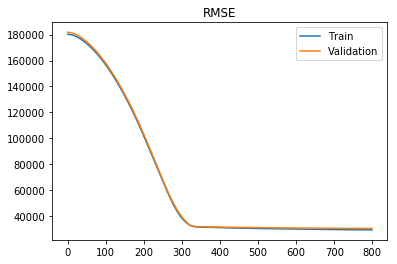

In [31]:
# On augmente le nombre d'episodes a 800.
training2 = model2.fit(X_train, Y_train, batch_size=32, epochs=800, validation_data=(X_val, Y_val))

# Modelisation graphique de la perte et de la precision pendant l'entrainement
plt.figure()
plt.title('RMSE')
plt.plot(training2.history['loss'], label='train')
plt.plot(training2.history['val_loss'], label='val')
plt.legend(['Train', 'Validation'])
plt.show()

On obtient un resultat a priori bien plus intéressant, puisqu'on s'approche des 30000. Le validation set nous permet par ailleurs de nous assurer qu'il n'y a pas d'overfitting du modèle. Testons maintenant la performance du modèle sur la prédiction du testing set. 

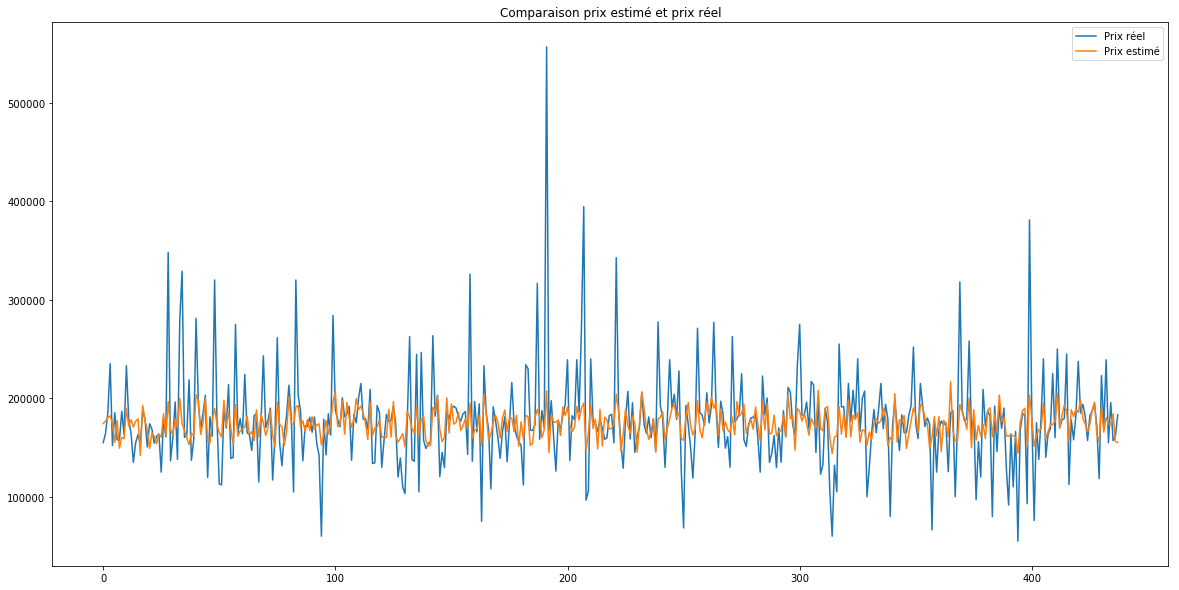

In [32]:
predictions2 = model2.predict(X_test)
plt.figure(figsize=(20, 10))
plt.title('Comparaison prix estimé et prix réel')
plt.plot(Y_test, label='Prix réel')
plt.plot(predictions2, label='Prix estimé')
plt.legend(['Prix réel', 'Prix estimé'])
plt.show()

Finalement, notre résultat n'est pas aussi bon qu'escompté : le modèle est assez performant sur les prix bas, mais dès lors qu'on souhaite prédire le prix de maisons plus luxueuses, notre modèle échoue. Ce problème est probablement du au choix du RMSE comme fonction de perte, en référence à ce que nous l'avions expliqué plus haut. On va donc essayer un nouveau modèle, cette fois-ci avec pour loss le mean absolute error, qui comme son nom l'indique fait la moyenne des valeurs absolues des différences entre la valeur prédite et la valeur réelle.

## Modèle 3

In [33]:
model3 = Sequential([
    Dense(16, activation='relu', input_shape=(275,)),
    Dense(1, activation='linear'), 
])

In [34]:
model3.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mean_absolute_error']
              )

Train on 2043 samples, validate on 438 samples
Epoch 1/800
2043/2043 [==============================] - 1s 525us/step - loss: 180176.8184 - mean_absolute_error: 180176.8594 - val_loss: 181744.8392 - val_mean_absolute_error: 181744.8281
Epoch 2/800
2043/2043 [==============================] - 0s 107us/step - loss: 180161.7148 - mean_absolute_error: 180161.7188 - val_loss: 181726.1157 - val_mean_absolute_error: 181726.0781
Epoch 3/800
2043/2043 [==============================] - 0s 106us/step - loss: 180139.1194 - mean_absolute_error: 180139.1406 - val_loss: 181699.4364 - val_mean_absolute_error: 181699.4375
Epoch 4/800
2043/2043 [==============================] - 0s 106us/step - loss: 180108.3360 - mean_absolute_error: 180108.3281 - val_loss: 181664.4021 - val_mean_absolute_error: 181664.4062
Epoch 5/800
2043/2043 [==============================] - 0s 105us/step - loss: 180068.8285 - mean_absolute_error: 180068.8438 - val_loss: 181619.6266 - val_mean_absolute_error: 181619.6406
Epoch 6/

Epoch 44/800
2043/2043 [==============================] - 0s 106us/step - loss: 172313.1199 - mean_absolute_error: 172313.0938 - val_loss: 173728.0093 - val_mean_absolute_error: 173728.0000
Epoch 45/800
2043/2043 [==============================] - 0s 105us/step - loss: 171990.1159 - mean_absolute_error: 171990.0938 - val_loss: 173402.5535 - val_mean_absolute_error: 173402.5781
Epoch 46/800
2043/2043 [==============================] - 0s 104us/step - loss: 171661.9523 - mean_absolute_error: 171661.9688 - val_loss: 173071.7593 - val_mean_absolute_error: 173071.7656
Epoch 47/800
2043/2043 [==============================] - 0s 107us/step - loss: 171328.5922 - mean_absolute_error: 171328.5938 - val_loss: 172736.1563 - val_mean_absolute_error: 172736.1719
Epoch 48/800
2043/2043 [==============================] - 0s 105us/step - loss: 170990.2060 - mean_absolute_error: 170990.2188 - val_loss: 172395.3172 - val_mean_absolute_error: 172395.3125
Epoch 49/800
2043/2043 [==========================

2043/2043 [==============================] - 0s 106us/step - loss: 154120.6981 - mean_absolute_error: 154120.6875 - val_loss: 155443.1074 - val_mean_absolute_error: 155443.1094
Epoch 88/800
2043/2043 [==============================] - 0s 107us/step - loss: 153598.9688 - mean_absolute_error: 153598.9531 - val_loss: 154919.1841 - val_mean_absolute_error: 154919.1719
Epoch 89/800
2043/2043 [==============================] - 0s 105us/step - loss: 153072.8403 - mean_absolute_error: 153072.8594 - val_loss: 154391.2437 - val_mean_absolute_error: 154391.2500
Epoch 90/800
2043/2043 [==============================] - 0s 106us/step - loss: 152542.4451 - mean_absolute_error: 152542.4375 - val_loss: 153858.9952 - val_mean_absolute_error: 153859.0156
Epoch 91/800
2043/2043 [==============================] - 0s 105us/step - loss: 152007.7509 - mean_absolute_error: 152007.7500 - val_loss: 153322.1921 - val_mean_absolute_error: 153322.1875
Epoch 92/800
2043/2043 [==============================] - 0s 10

2043/2043 [==============================] - 0s 105us/step - loss: 127898.6965 - mean_absolute_error: 127898.6875 - val_loss: 129200.6931 - val_mean_absolute_error: 129200.6953
Epoch 131/800
2043/2043 [==============================] - 0s 107us/step - loss: 127198.4971 - mean_absolute_error: 127198.4844 - val_loss: 128502.0469 - val_mean_absolute_error: 128502.0391
Epoch 132/800
2043/2043 [==============================] - 0s 105us/step - loss: 126493.9584 - mean_absolute_error: 126493.9766 - val_loss: 127799.5383 - val_mean_absolute_error: 127799.5312
Epoch 133/800
2043/2043 [==============================] - 0s 109us/step - loss: 125785.3584 - mean_absolute_error: 125785.3438 - val_loss: 127092.7842 - val_mean_absolute_error: 127092.7969
Epoch 134/800
2043/2043 [==============================] - 0s 107us/step - loss: 125072.5127 - mean_absolute_error: 125072.4922 - val_loss: 126382.2641 - val_mean_absolute_error: 126382.2734
Epoch 135/800
2043/2043 [==============================] - 

2043/2043 [==============================] - 0s 118us/step - loss: 94381.2498 - mean_absolute_error: 94381.2344 - val_loss: 95735.1187 - val_mean_absolute_error: 95735.1016
Epoch 174/800
2043/2043 [==============================] - 0s 108us/step - loss: 93535.6442 - mean_absolute_error: 93535.6484 - val_loss: 94892.7928 - val_mean_absolute_error: 94892.7969
Epoch 175/800
2043/2043 [==============================] - 0s 130us/step - loss: 92689.2880 - mean_absolute_error: 92689.2969 - val_loss: 94048.3049 - val_mean_absolute_error: 94048.2891
Epoch 176/800
2043/2043 [==============================] - 0s 106us/step - loss: 91842.5912 - mean_absolute_error: 91842.6016 - val_loss: 93205.1178 - val_mean_absolute_error: 93205.1172
Epoch 177/800
2043/2043 [==============================] - 0s 110us/step - loss: 90995.8166 - mean_absolute_error: 90995.8203 - val_loss: 92362.5866 - val_mean_absolute_error: 92362.5859
Epoch 178/800
2043/2043 [==============================] - 0s 112us/step - loss

Epoch 217/800
2043/2043 [==============================] - 0s 107us/step - loss: 57616.3440 - mean_absolute_error: 57616.3438 - val_loss: 58529.4360 - val_mean_absolute_error: 58529.4375
Epoch 218/800
2043/2043 [==============================] - 0s 111us/step - loss: 56847.7524 - mean_absolute_error: 56847.7617 - val_loss: 57761.3222 - val_mean_absolute_error: 57761.3242
Epoch 219/800
2043/2043 [==============================] - 0s 108us/step - loss: 56081.6588 - mean_absolute_error: 56081.6562 - val_loss: 57001.2983 - val_mean_absolute_error: 57001.2969
Epoch 220/800
2043/2043 [==============================] - 0s 113us/step - loss: 55317.6585 - mean_absolute_error: 55317.6562 - val_loss: 56244.2449 - val_mean_absolute_error: 56244.2461
Epoch 221/800
2043/2043 [==============================] - 0s 105us/step - loss: 54553.7532 - mean_absolute_error: 54553.7461 - val_loss: 55505.9940 - val_mean_absolute_error: 55505.9961
Epoch 222/800
2043/2043 [==============================] - 0s 106

Epoch 261/800
2043/2043 [==============================] - 0s 106us/step - loss: 34189.0040 - mean_absolute_error: 34189.0078 - val_loss: 34632.0967 - val_mean_absolute_error: 34632.0977
Epoch 262/800
2043/2043 [==============================] - 0s 105us/step - loss: 33947.3895 - mean_absolute_error: 33947.3828 - val_loss: 34362.0524 - val_mean_absolute_error: 34362.0508
Epoch 263/800
2043/2043 [==============================] - 0s 105us/step - loss: 33717.4404 - mean_absolute_error: 33717.4414 - val_loss: 34108.1078 - val_mean_absolute_error: 34108.1055
Epoch 264/800
2043/2043 [==============================] - 0s 107us/step - loss: 33502.2165 - mean_absolute_error: 33502.2109 - val_loss: 33868.1036 - val_mean_absolute_error: 33868.1016
Epoch 265/800
2043/2043 [==============================] - 0s 105us/step - loss: 33307.6498 - mean_absolute_error: 33307.6484 - val_loss: 33647.6492 - val_mean_absolute_error: 33647.6484
Epoch 266/800
2043/2043 [==============================] - 0s 108

Epoch 305/800
2043/2043 [==============================] - 0s 121us/step - loss: 31633.6854 - mean_absolute_error: 31633.6797 - val_loss: 32001.1236 - val_mean_absolute_error: 32001.1211
Epoch 306/800
2043/2043 [==============================] - 0s 118us/step - loss: 31623.4112 - mean_absolute_error: 31623.4062 - val_loss: 31993.9380 - val_mean_absolute_error: 31993.9375
Epoch 307/800
2043/2043 [==============================] - 0s 121us/step - loss: 31613.0600 - mean_absolute_error: 31613.0547 - val_loss: 31986.5227 - val_mean_absolute_error: 31986.5234
Epoch 308/800
2043/2043 [==============================] - 0s 112us/step - loss: 31602.5443 - mean_absolute_error: 31602.5488 - val_loss: 31979.4811 - val_mean_absolute_error: 31979.4824
Epoch 309/800
2043/2043 [==============================] - 0s 110us/step - loss: 31593.1583 - mean_absolute_error: 31593.1602 - val_loss: 31972.4426 - val_mean_absolute_error: 31972.4414
Epoch 310/800
2043/2043 [==============================] - 0s 114

Epoch 349/800
2043/2043 [==============================] - 0s 135us/step - loss: 31211.4566 - mean_absolute_error: 31211.4590 - val_loss: 31707.2926 - val_mean_absolute_error: 31707.2949
Epoch 350/800
2043/2043 [==============================] - 0s 120us/step - loss: 31202.8727 - mean_absolute_error: 31202.8730 - val_loss: 31701.3659 - val_mean_absolute_error: 31701.3672
Epoch 351/800
2043/2043 [==============================] - 0s 125us/step - loss: 31194.9522 - mean_absolute_error: 31194.9492 - val_loss: 31696.2519 - val_mean_absolute_error: 31696.2520
Epoch 352/800
2043/2043 [==============================] - 0s 162us/step - loss: 31186.3946 - mean_absolute_error: 31186.3945 - val_loss: 31690.3016 - val_mean_absolute_error: 31690.3008
Epoch 353/800
2043/2043 [==============================] - 0s 128us/step - loss: 31177.4142 - mean_absolute_error: 31177.4102 - val_loss: 31684.5071 - val_mean_absolute_error: 31684.5117
Epoch 354/800
2043/2043 [==============================] - 0s 160

Epoch 393/800
2043/2043 [==============================] - 0s 160us/step - loss: 30868.2045 - mean_absolute_error: 30868.2031 - val_loss: 31488.9450 - val_mean_absolute_error: 31488.9434
Epoch 394/800
2043/2043 [==============================] - 0s 182us/step - loss: 30861.2805 - mean_absolute_error: 30861.2754 - val_loss: 31484.6931 - val_mean_absolute_error: 31484.6914
Epoch 395/800
2043/2043 [==============================] - 0s 119us/step - loss: 30853.9781 - mean_absolute_error: 30853.9746 - val_loss: 31480.8890 - val_mean_absolute_error: 31480.8867
Epoch 396/800
2043/2043 [==============================] - 0s 167us/step - loss: 30847.6224 - mean_absolute_error: 30847.6270 - val_loss: 31475.8240 - val_mean_absolute_error: 31475.8223
Epoch 397/800
2043/2043 [==============================] - 0s 128us/step - loss: 30841.1469 - mean_absolute_error: 30841.1406 - val_loss: 31472.4560 - val_mean_absolute_error: 31472.4570
Epoch 398/800
2043/2043 [==============================] - 0s 149

Epoch 437/800
2043/2043 [==============================] - 0s 122us/step - loss: 30596.6499 - mean_absolute_error: 30596.6504 - val_loss: 31314.4855 - val_mean_absolute_error: 31314.4883
Epoch 438/800
2043/2043 [==============================] - 0s 121us/step - loss: 30590.7789 - mean_absolute_error: 30590.7773 - val_loss: 31311.8229 - val_mean_absolute_error: 31311.8223
Epoch 439/800
2043/2043 [==============================] - 0s 131us/step - loss: 30585.3921 - mean_absolute_error: 30585.3887 - val_loss: 31308.2291 - val_mean_absolute_error: 31308.2285
Epoch 440/800
2043/2043 [==============================] - 0s 115us/step - loss: 30580.5569 - mean_absolute_error: 30580.5566 - val_loss: 31303.6469 - val_mean_absolute_error: 31303.6445
Epoch 441/800
2043/2043 [==============================] - 0s 121us/step - loss: 30573.7855 - mean_absolute_error: 30573.7793 - val_loss: 31299.2788 - val_mean_absolute_error: 31299.2812
Epoch 442/800
2043/2043 [==============================] - 0s 120

Epoch 481/800
2043/2043 [==============================] - 0s 122us/step - loss: 30357.8684 - mean_absolute_error: 30357.8730 - val_loss: 31160.8210 - val_mean_absolute_error: 31160.8223
Epoch 482/800
2043/2043 [==============================] - 0s 121us/step - loss: 30353.0859 - mean_absolute_error: 30353.0781 - val_loss: 31155.5122 - val_mean_absolute_error: 31155.5117
Epoch 483/800
2043/2043 [==============================] - 0s 129us/step - loss: 30347.0354 - mean_absolute_error: 30347.0312 - val_loss: 31154.2775 - val_mean_absolute_error: 31154.2793
Epoch 484/800
2043/2043 [==============================] - 0s 121us/step - loss: 30341.6854 - mean_absolute_error: 30341.6836 - val_loss: 31148.5541 - val_mean_absolute_error: 31148.5547
Epoch 485/800
2043/2043 [==============================] - 0s 124us/step - loss: 30336.4311 - mean_absolute_error: 30336.4316 - val_loss: 31145.8035 - val_mean_absolute_error: 31145.8008
Epoch 486/800
2043/2043 [==============================] - 0s 118

Epoch 525/800
2043/2043 [==============================] - 0s 119us/step - loss: 30143.3450 - mean_absolute_error: 30143.3477 - val_loss: 31008.7959 - val_mean_absolute_error: 31008.7969
Epoch 526/800
2043/2043 [==============================] - 0s 122us/step - loss: 30138.6388 - mean_absolute_error: 30138.6406 - val_loss: 31006.4610 - val_mean_absolute_error: 31006.4590
Epoch 527/800
2043/2043 [==============================] - 0s 131us/step - loss: 30134.1938 - mean_absolute_error: 30134.1992 - val_loss: 31002.9331 - val_mean_absolute_error: 31002.9316
Epoch 528/800
2043/2043 [==============================] - 0s 118us/step - loss: 30130.1918 - mean_absolute_error: 30130.1895 - val_loss: 31002.7272 - val_mean_absolute_error: 31002.7305
Epoch 529/800
2043/2043 [==============================] - 0s 118us/step - loss: 30126.2306 - mean_absolute_error: 30126.2324 - val_loss: 30997.0405 - val_mean_absolute_error: 30997.0410
Epoch 530/800
2043/2043 [==============================] - 0s 119

Epoch 569/800
2043/2043 [==============================] - 0s 126us/step - loss: 29956.1164 - mean_absolute_error: 29956.1133 - val_loss: 30901.7319 - val_mean_absolute_error: 30901.7285
Epoch 570/800
2043/2043 [==============================] - 0s 122us/step - loss: 29951.6255 - mean_absolute_error: 29951.6230 - val_loss: 30898.7849 - val_mean_absolute_error: 30898.7852
Epoch 571/800
2043/2043 [==============================] - 0s 129us/step - loss: 29946.8497 - mean_absolute_error: 29946.8477 - val_loss: 30897.7587 - val_mean_absolute_error: 30897.7578
Epoch 572/800
2043/2043 [==============================] - 0s 120us/step - loss: 29943.9085 - mean_absolute_error: 29943.9102 - val_loss: 30896.1989 - val_mean_absolute_error: 30896.1973
Epoch 573/800
2043/2043 [==============================] - 0s 118us/step - loss: 29939.3347 - mean_absolute_error: 29939.3340 - val_loss: 30894.2599 - val_mean_absolute_error: 30894.2578
Epoch 574/800
2043/2043 [==============================] - 0s 121

Epoch 613/800
2043/2043 [==============================] - 0s 120us/step - loss: 29790.5754 - mean_absolute_error: 29790.5723 - val_loss: 30818.6656 - val_mean_absolute_error: 30818.6641
Epoch 614/800
2043/2043 [==============================] - 0s 124us/step - loss: 29786.7980 - mean_absolute_error: 29786.8047 - val_loss: 30819.2438 - val_mean_absolute_error: 30819.2461
Epoch 615/800
2043/2043 [==============================] - 0s 131us/step - loss: 29785.0383 - mean_absolute_error: 29785.0391 - val_loss: 30816.5306 - val_mean_absolute_error: 30816.5273
Epoch 616/800
2043/2043 [==============================] - 0s 127us/step - loss: 29780.5487 - mean_absolute_error: 29780.5508 - val_loss: 30813.9708 - val_mean_absolute_error: 30813.9707
Epoch 617/800
2043/2043 [==============================] - 0s 129us/step - loss: 29778.2393 - mean_absolute_error: 29778.2383 - val_loss: 30811.5102 - val_mean_absolute_error: 30811.5117
Epoch 618/800
2043/2043 [==============================] - 0s 124

Epoch 657/800
2043/2043 [==============================] - 0s 131us/step - loss: 29650.9601 - mean_absolute_error: 29650.9609 - val_loss: 30755.3274 - val_mean_absolute_error: 30755.3262
Epoch 658/800
2043/2043 [==============================] - 0s 131us/step - loss: 29647.1378 - mean_absolute_error: 29647.1328 - val_loss: 30750.6302 - val_mean_absolute_error: 30750.6270
Epoch 659/800
2043/2043 [==============================] - 0s 137us/step - loss: 29646.1026 - mean_absolute_error: 29646.1094 - val_loss: 30753.5445 - val_mean_absolute_error: 30753.5430
Epoch 660/800
2043/2043 [==============================] - 0s 122us/step - loss: 29641.8452 - mean_absolute_error: 29641.8438 - val_loss: 30749.1764 - val_mean_absolute_error: 30749.1738
Epoch 661/800
2043/2043 [==============================] - 0s 124us/step - loss: 29639.9292 - mean_absolute_error: 29639.9316 - val_loss: 30742.6612 - val_mean_absolute_error: 30742.6641
Epoch 662/800
2043/2043 [==============================] - 0s 124

Epoch 701/800
2043/2043 [==============================] - 0s 118us/step - loss: 29531.5421 - mean_absolute_error: 29531.5391 - val_loss: 30699.7290 - val_mean_absolute_error: 30699.7285
Epoch 702/800
2043/2043 [==============================] - 0s 124us/step - loss: 29528.4857 - mean_absolute_error: 29528.4883 - val_loss: 30703.2644 - val_mean_absolute_error: 30703.2676
Epoch 703/800
2043/2043 [==============================] - 0s 132us/step - loss: 29526.2161 - mean_absolute_error: 29526.2227 - val_loss: 30700.5709 - val_mean_absolute_error: 30700.5703
Epoch 704/800
2043/2043 [==============================] - 0s 117us/step - loss: 29523.4180 - mean_absolute_error: 29523.4199 - val_loss: 30700.7058 - val_mean_absolute_error: 30700.7070
Epoch 705/800
2043/2043 [==============================] - 0s 120us/step - loss: 29523.3584 - mean_absolute_error: 29523.3574 - val_loss: 30700.2387 - val_mean_absolute_error: 30700.2402
Epoch 706/800
2043/2043 [==============================] - 0s 121

Epoch 745/800
2043/2043 [==============================] - 0s 122us/step - loss: 29420.8598 - mean_absolute_error: 29420.8594 - val_loss: 30661.3527 - val_mean_absolute_error: 30661.3516
Epoch 746/800
2043/2043 [==============================] - 0s 123us/step - loss: 29417.6904 - mean_absolute_error: 29417.6953 - val_loss: 30658.5676 - val_mean_absolute_error: 30658.5664
Epoch 747/800
2043/2043 [==============================] - 0s 130us/step - loss: 29416.1563 - mean_absolute_error: 29416.1562 - val_loss: 30659.6156 - val_mean_absolute_error: 30659.6172
Epoch 748/800
2043/2043 [==============================] - 0s 115us/step - loss: 29413.2863 - mean_absolute_error: 29413.2871 - val_loss: 30657.2450 - val_mean_absolute_error: 30657.2441
Epoch 749/800
2043/2043 [==============================] - 0s 122us/step - loss: 29412.1000 - mean_absolute_error: 29412.0996 - val_loss: 30654.8235 - val_mean_absolute_error: 30654.8242
Epoch 750/800
2043/2043 [==============================] - 0s 121

Epoch 789/800
2043/2043 [==============================] - 0s 120us/step - loss: 29320.5111 - mean_absolute_error: 29320.5059 - val_loss: 30620.1373 - val_mean_absolute_error: 30620.1367
Epoch 790/800
2043/2043 [==============================] - 0s 122us/step - loss: 29318.3622 - mean_absolute_error: 29318.3613 - val_loss: 30618.2815 - val_mean_absolute_error: 30618.2793
Epoch 791/800
2043/2043 [==============================] - 0s 130us/step - loss: 29316.1066 - mean_absolute_error: 29316.1074 - val_loss: 30616.3520 - val_mean_absolute_error: 30616.3496
Epoch 792/800
2043/2043 [==============================] - 0s 118us/step - loss: 29313.3196 - mean_absolute_error: 29313.3223 - val_loss: 30617.0558 - val_mean_absolute_error: 30617.0566
Epoch 793/800
2043/2043 [==============================] - 0s 119us/step - loss: 29311.8651 - mean_absolute_error: 29311.8672 - val_loss: 30616.8969 - val_mean_absolute_error: 30616.8965
Epoch 794/800
2043/2043 [==============================] - 0s 125

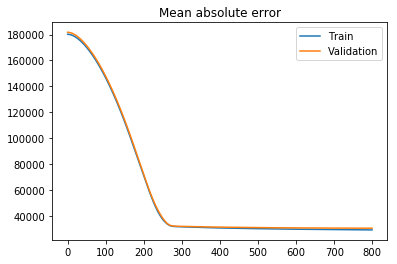

In [35]:
training3 = model3.fit(X_train, Y_train, batch_size=32, epochs=800, validation_data=(X_val, Y_val))

# Modelisation graphique de la perte et de la precision pendant l'entrainement
plt.figure()
plt.title('Mean absolute error')
plt.plot(training3.history['loss'], label='train')
plt.plot(training3.history['val_loss'], label='val')
plt.legend(['Train', 'Validation'])
plt.show()

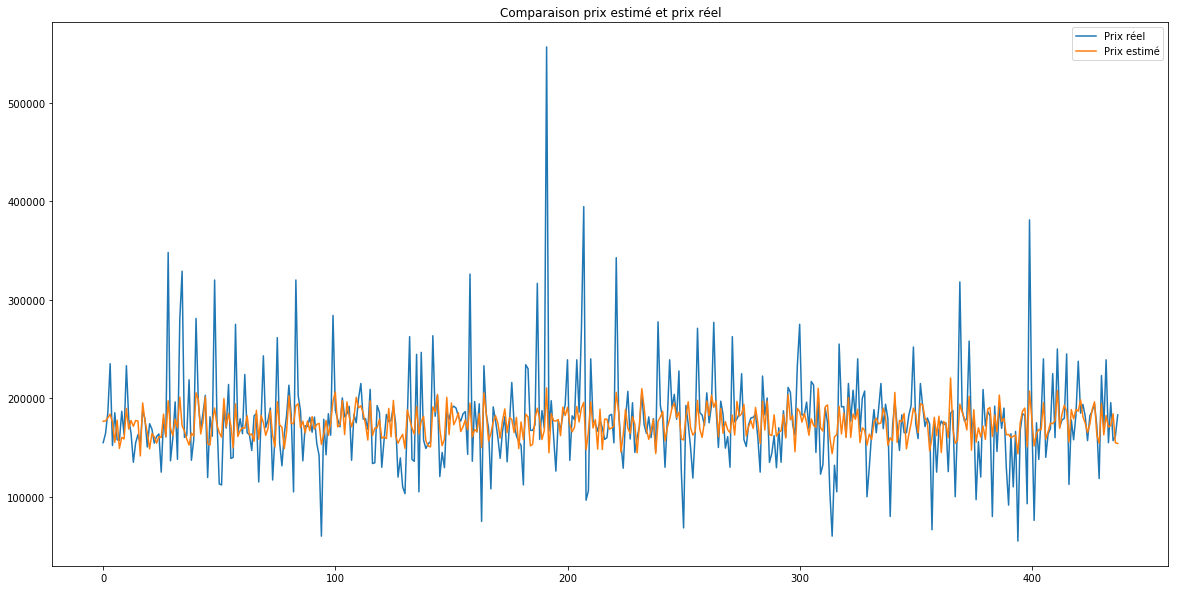

In [36]:
predictions3 = model3.predict(X_test)
plt.figure(figsize=(20, 10))
plt.title('Comparaison prix estimé et prix réel')
plt.plot(Y_test, label='Prix réel')
plt.plot(predictions3, label='Prix estimé')
plt.legend(['Prix réel', 'Prix estimé'])
plt.show()

In [37]:
ecart3 = Difference(predictions3, Y_test)
print(np.mean(ecart3))
print(np.median(ecart3))

26285.23098601598
16135.0625


## Modèle 4
Ça n'a pas vraiment marché en conservant les couches du modèle 2 et en changeant seulement la fonction loss, on va donc muscler notre réseau de neurones.

In [38]:
model4 = Sequential([
    Dense(216, activation='relu', input_shape=(275,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu',),
    Dense(1,activation='linear'),
])

In [39]:
model4.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mean_absolute_error']
              )

Train on 2043 samples, validate on 438 samples
Epoch 1/1000
2043/2043 [==============================] - 3s 1ms/step - loss: 179317.0003 - mean_absolute_error: 179317.0000 - val_loss: 175072.6294 - val_mean_absolute_error: 175072.6406
Epoch 2/1000
2043/2043 [==============================] - 1s 401us/step - loss: 89300.5493 - mean_absolute_error: 89300.5234 - val_loss: 31939.6518 - val_mean_absolute_error: 31939.6523
Epoch 3/1000
2043/2043 [==============================] - 1s 404us/step - loss: 31414.6425 - mean_absolute_error: 31414.6426 - val_loss: 31297.9106 - val_mean_absolute_error: 31297.9102
Epoch 4/1000
2043/2043 [==============================] - 1s 407us/step - loss: 30476.0227 - mean_absolute_error: 30476.0273 - val_loss: 30933.8063 - val_mean_absolute_error: 30933.8086
Epoch 5/1000
2043/2043 [==============================] - 1s 403us/step - loss: 29962.3076 - mean_absolute_error: 29962.3066 - val_loss: 30831.9292 - val_mean_absolute_error: 30831.9316
Epoch 6/1000
2043/204

2043/2043 [==============================] - 1s 491us/step - loss: 26839.8212 - mean_absolute_error: 26839.8242 - val_loss: 32091.0983 - val_mean_absolute_error: 32091.0977
Epoch 45/1000
2043/2043 [==============================] - 1s 446us/step - loss: 26549.3832 - mean_absolute_error: 26549.3828 - val_loss: 32309.4557 - val_mean_absolute_error: 32309.4512
Epoch 46/1000
2043/2043 [==============================] - 1s 460us/step - loss: 26600.9050 - mean_absolute_error: 26600.9043 - val_loss: 32442.2108 - val_mean_absolute_error: 32442.2109
Epoch 47/1000
2043/2043 [==============================] - 1s 440us/step - loss: 26512.1797 - mean_absolute_error: 26512.1758 - val_loss: 32009.3601 - val_mean_absolute_error: 32009.3613
Epoch 48/1000
2043/2043 [==============================] - 1s 422us/step - loss: 26407.8133 - mean_absolute_error: 26407.8184 - val_loss: 32051.2087 - val_mean_absolute_error: 32051.2070
Epoch 49/1000
2043/2043 [==============================] - 1s 420us/step - loss

Epoch 88/1000
2043/2043 [==============================] - 1s 404us/step - loss: 25527.6330 - mean_absolute_error: 25527.6367 - val_loss: 32221.5376 - val_mean_absolute_error: 32221.5391
Epoch 89/1000
2043/2043 [==============================] - 1s 398us/step - loss: 25705.0688 - mean_absolute_error: 25705.0723 - val_loss: 32341.6218 - val_mean_absolute_error: 32341.6211
Epoch 90/1000
2043/2043 [==============================] - 1s 401us/step - loss: 25487.1116 - mean_absolute_error: 25487.1094 - val_loss: 32181.7166 - val_mean_absolute_error: 32181.7188
Epoch 91/1000
2043/2043 [==============================] - 1s 396us/step - loss: 25457.1243 - mean_absolute_error: 25457.1270 - val_loss: 32130.0887 - val_mean_absolute_error: 32130.0859
Epoch 92/1000
2043/2043 [==============================] - 1s 401us/step - loss: 25544.2228 - mean_absolute_error: 25544.2168 - val_loss: 32184.1050 - val_mean_absolute_error: 32184.1055
Epoch 93/1000
2043/2043 [==============================] - 1s 402

Epoch 132/1000
2043/2043 [==============================] - 1s 583us/step - loss: 24767.8060 - mean_absolute_error: 24767.8066 - val_loss: 32413.3041 - val_mean_absolute_error: 32413.3008
Epoch 133/1000
2043/2043 [==============================] - 1s 463us/step - loss: 24837.8304 - mean_absolute_error: 24837.8242 - val_loss: 32314.9770 - val_mean_absolute_error: 32314.9766
Epoch 134/1000
2043/2043 [==============================] - 1s 494us/step - loss: 24737.0058 - mean_absolute_error: 24737.0059 - val_loss: 32252.6831 - val_mean_absolute_error: 32252.6855
Epoch 135/1000
2043/2043 [==============================] - 1s 430us/step - loss: 24792.1921 - mean_absolute_error: 24792.1914 - val_loss: 32843.2989 - val_mean_absolute_error: 32843.2969
Epoch 136/1000
2043/2043 [==============================] - 1s 425us/step - loss: 25294.0498 - mean_absolute_error: 25294.0566 - val_loss: 32219.6864 - val_mean_absolute_error: 32219.6875
Epoch 137/1000
2043/2043 [==============================] - 

2043/2043 [==============================] - 1s 414us/step - loss: 23756.4764 - mean_absolute_error: 23756.4824 - val_loss: 32242.3018 - val_mean_absolute_error: 32242.3008
Epoch 176/1000
2043/2043 [==============================] - 1s 413us/step - loss: 23823.8035 - mean_absolute_error: 23823.8047 - val_loss: 32217.4223 - val_mean_absolute_error: 32217.4199
Epoch 177/1000
2043/2043 [==============================] - 1s 410us/step - loss: 23867.5778 - mean_absolute_error: 23867.5801 - val_loss: 32262.8006 - val_mean_absolute_error: 32262.8008
Epoch 178/1000
2043/2043 [==============================] - 1s 416us/step - loss: 23636.3270 - mean_absolute_error: 23636.3301 - val_loss: 32325.0283 - val_mean_absolute_error: 32325.0293
Epoch 179/1000
2043/2043 [==============================] - 1s 415us/step - loss: 23630.2128 - mean_absolute_error: 23630.2090 - val_loss: 32485.9968 - val_mean_absolute_error: 32486.0000
Epoch 180/1000
2043/2043 [==============================] - 1s 419us/step -

Epoch 219/1000
2043/2043 [==============================] - 1s 413us/step - loss: 22265.3579 - mean_absolute_error: 22265.3594 - val_loss: 32768.1607 - val_mean_absolute_error: 32768.1602
Epoch 220/1000
2043/2043 [==============================] - 1s 451us/step - loss: 22327.4227 - mean_absolute_error: 22327.4199 - val_loss: 32839.1248 - val_mean_absolute_error: 32839.1250
Epoch 221/1000
2043/2043 [==============================] - 1s 424us/step - loss: 22287.1715 - mean_absolute_error: 22287.1758 - val_loss: 32933.7303 - val_mean_absolute_error: 32933.7305
Epoch 222/1000
2043/2043 [==============================] - 1s 418us/step - loss: 22263.0598 - mean_absolute_error: 22263.0645 - val_loss: 32869.0101 - val_mean_absolute_error: 32869.0117
Epoch 223/1000
2043/2043 [==============================] - 1s 412us/step - loss: 22222.8855 - mean_absolute_error: 22222.8867 - val_loss: 32868.8869 - val_mean_absolute_error: 32868.8828
Epoch 224/1000
2043/2043 [==============================] - 

2043/2043 [==============================] - 1s 392us/step - loss: 20547.2565 - mean_absolute_error: 20547.2520 - val_loss: 33786.8947 - val_mean_absolute_error: 33786.8945
Epoch 263/1000
2043/2043 [==============================] - 1s 375us/step - loss: 20636.7031 - mean_absolute_error: 20636.7051 - val_loss: 33766.8372 - val_mean_absolute_error: 33766.8359
Epoch 264/1000
2043/2043 [==============================] - 1s 380us/step - loss: 20737.4652 - mean_absolute_error: 20737.4668 - val_loss: 34171.0031 - val_mean_absolute_error: 34171.0039
Epoch 265/1000
2043/2043 [==============================] - 1s 364us/step - loss: 20549.5170 - mean_absolute_error: 20549.5156 - val_loss: 33901.5161 - val_mean_absolute_error: 33901.5156
Epoch 266/1000
2043/2043 [==============================] - 1s 381us/step - loss: 20439.1058 - mean_absolute_error: 20439.1055 - val_loss: 33855.5608 - val_mean_absolute_error: 33855.5625
Epoch 267/1000
2043/2043 [==============================] - 1s 368us/step -

Epoch 306/1000
2043/2043 [==============================] - 1s 364us/step - loss: 18107.1749 - mean_absolute_error: 18107.1777 - val_loss: 34342.8790 - val_mean_absolute_error: 34342.8750
Epoch 307/1000
2043/2043 [==============================] - 1s 364us/step - loss: 17854.7798 - mean_absolute_error: 17854.7773 - val_loss: 34541.9680 - val_mean_absolute_error: 34541.9688
Epoch 308/1000
2043/2043 [==============================] - 1s 413us/step - loss: 17744.6442 - mean_absolute_error: 17744.6445 - val_loss: 34547.1194 - val_mean_absolute_error: 34547.1250
Epoch 309/1000
2043/2043 [==============================] - 1s 366us/step - loss: 17745.5942 - mean_absolute_error: 17745.5938 - val_loss: 34731.5597 - val_mean_absolute_error: 34731.5586
Epoch 310/1000
2043/2043 [==============================] - 1s 378us/step - loss: 17693.2982 - mean_absolute_error: 17693.2969 - val_loss: 34493.5457 - val_mean_absolute_error: 34493.5469
Epoch 311/1000
2043/2043 [==============================] - 

2043/2043 [==============================] - 1s 366us/step - loss: 14617.7298 - mean_absolute_error: 14617.7295 - val_loss: 35135.6262 - val_mean_absolute_error: 35135.6250
Epoch 350/1000
2043/2043 [==============================] - 1s 367us/step - loss: 14443.0656 - mean_absolute_error: 14443.0645 - val_loss: 35078.4407 - val_mean_absolute_error: 35078.4414
Epoch 351/1000
2043/2043 [==============================] - 1s 425us/step - loss: 14514.6951 - mean_absolute_error: 14514.6953 - val_loss: 35410.2298 - val_mean_absolute_error: 35410.2305
Epoch 352/1000
2043/2043 [==============================] - 1s 393us/step - loss: 14366.6190 - mean_absolute_error: 14366.6162 - val_loss: 35567.1067 - val_mean_absolute_error: 35567.1055
Epoch 353/1000
2043/2043 [==============================] - 1s 361us/step - loss: 14451.7592 - mean_absolute_error: 14451.7578 - val_loss: 35409.4103 - val_mean_absolute_error: 35409.4062
Epoch 354/1000
2043/2043 [==============================] - 1s 373us/step -

Epoch 393/1000
2043/2043 [==============================] - 1s 422us/step - loss: 11512.5056 - mean_absolute_error: 11512.5059 - val_loss: 36181.7945 - val_mean_absolute_error: 36181.7891
Epoch 394/1000
2043/2043 [==============================] - 1s 423us/step - loss: 11399.2560 - mean_absolute_error: 11399.2568 - val_loss: 36163.3898 - val_mean_absolute_error: 36163.3867
Epoch 395/1000
2043/2043 [==============================] - 1s 421us/step - loss: 11621.4728 - mean_absolute_error: 11621.4717 - val_loss: 36184.7809 - val_mean_absolute_error: 36184.7852
Epoch 396/1000
2043/2043 [==============================] - 1s 418us/step - loss: 11696.1540 - mean_absolute_error: 11696.1543 - val_loss: 36273.7546 - val_mean_absolute_error: 36273.7539
Epoch 397/1000
2043/2043 [==============================] - 1s 425us/step - loss: 11187.6232 - mean_absolute_error: 11187.6201 - val_loss: 36321.0512 - val_mean_absolute_error: 36321.0469
Epoch 398/1000
2043/2043 [==============================] - 

Epoch 437/1000
2043/2043 [==============================] - 1s 416us/step - loss: 9877.4921 - mean_absolute_error: 9877.4893 - val_loss: 37216.5024 - val_mean_absolute_error: 37216.5039
Epoch 438/1000
2043/2043 [==============================] - 1s 409us/step - loss: 9402.4008 - mean_absolute_error: 9402.4014 - val_loss: 37302.5687 - val_mean_absolute_error: 37302.5664
Epoch 439/1000
2043/2043 [==============================] - 1s 422us/step - loss: 9452.4599 - mean_absolute_error: 9452.4609 - val_loss: 37036.1892 - val_mean_absolute_error: 37036.1836
Epoch 440/1000
2043/2043 [==============================] - 1s 422us/step - loss: 8905.4629 - mean_absolute_error: 8905.4619 - val_loss: 37332.4005 - val_mean_absolute_error: 37332.3984
Epoch 441/1000
2043/2043 [==============================] - 1s 424us/step - loss: 9468.8287 - mean_absolute_error: 9468.8271 - val_loss: 36910.5921 - val_mean_absolute_error: 36910.5977
Epoch 442/1000
2043/2043 [==============================] - 1s 416us/s

2043/2043 [==============================] - 1s 421us/step - loss: 7444.2670 - mean_absolute_error: 7444.2661 - val_loss: 38153.9038 - val_mean_absolute_error: 38153.9062
Epoch 482/1000
2043/2043 [==============================] - 1s 413us/step - loss: 7491.4843 - mean_absolute_error: 7491.4834 - val_loss: 38203.1905 - val_mean_absolute_error: 38203.1914
Epoch 483/1000
2043/2043 [==============================] - 1s 418us/step - loss: 7493.0238 - mean_absolute_error: 7493.0249 - val_loss: 38481.2458 - val_mean_absolute_error: 38481.2461
Epoch 484/1000
2043/2043 [==============================] - 1s 412us/step - loss: 7624.4069 - mean_absolute_error: 7624.4067 - val_loss: 38080.1864 - val_mean_absolute_error: 38080.1836
Epoch 485/1000
2043/2043 [==============================] - 1s 417us/step - loss: 8076.0933 - mean_absolute_error: 8076.0913 - val_loss: 38511.0187 - val_mean_absolute_error: 38511.0195
Epoch 486/1000
2043/2043 [==============================] - 1s 415us/step - loss: 796

2043/2043 [==============================] - 1s 420us/step - loss: 6197.6011 - mean_absolute_error: 6197.6011 - val_loss: 38372.4752 - val_mean_absolute_error: 38372.4766
Epoch 526/1000
2043/2043 [==============================] - 1s 419us/step - loss: 6354.0836 - mean_absolute_error: 6354.0835 - val_loss: 38512.6980 - val_mean_absolute_error: 38512.6992
Epoch 527/1000
2043/2043 [==============================] - 1s 412us/step - loss: 6339.0330 - mean_absolute_error: 6339.0327 - val_loss: 38667.6986 - val_mean_absolute_error: 38667.6992
Epoch 528/1000
2043/2043 [==============================] - 1s 422us/step - loss: 7100.3156 - mean_absolute_error: 7100.3154 - val_loss: 38786.5910 - val_mean_absolute_error: 38786.5938
Epoch 529/1000
2043/2043 [==============================] - 1s 423us/step - loss: 6473.3845 - mean_absolute_error: 6473.3843 - val_loss: 38652.8540 - val_mean_absolute_error: 38652.8555
Epoch 530/1000
2043/2043 [==============================] - 1s 420us/step - loss: 702

2043/2043 [==============================] - 1s 422us/step - loss: 5521.5787 - mean_absolute_error: 5521.5776 - val_loss: 38837.3861 - val_mean_absolute_error: 38837.3867
Epoch 570/1000
2043/2043 [==============================] - 1s 468us/step - loss: 5621.7088 - mean_absolute_error: 5621.7085 - val_loss: 39003.0831 - val_mean_absolute_error: 39003.0820
Epoch 571/1000
2043/2043 [==============================] - 1s 433us/step - loss: 5300.9468 - mean_absolute_error: 5300.9478 - val_loss: 38982.1790 - val_mean_absolute_error: 38982.1836
Epoch 572/1000
2043/2043 [==============================] - 1s 423us/step - loss: 5356.1361 - mean_absolute_error: 5356.1372 - val_loss: 39113.9732 - val_mean_absolute_error: 39113.9727
Epoch 573/1000
2043/2043 [==============================] - 1s 425us/step - loss: 5200.3425 - mean_absolute_error: 5200.3428 - val_loss: 39122.0430 - val_mean_absolute_error: 39122.0430
Epoch 574/1000
2043/2043 [==============================] - 1s 412us/step - loss: 552

2043/2043 [==============================] - 1s 421us/step - loss: 4994.3924 - mean_absolute_error: 4994.3926 - val_loss: 39412.7698 - val_mean_absolute_error: 39412.7734
Epoch 614/1000
2043/2043 [==============================] - 1s 411us/step - loss: 4914.9599 - mean_absolute_error: 4914.9585 - val_loss: 39235.2369 - val_mean_absolute_error: 39235.2383
Epoch 615/1000
2043/2043 [==============================] - 1s 412us/step - loss: 4604.6387 - mean_absolute_error: 4604.6382 - val_loss: 39417.0133 - val_mean_absolute_error: 39417.0156
Epoch 616/1000
2043/2043 [==============================] - 1s 411us/step - loss: 5118.8296 - mean_absolute_error: 5118.8296 - val_loss: 39477.3909 - val_mean_absolute_error: 39477.3867
Epoch 617/1000
2043/2043 [==============================] - 1s 413us/step - loss: 5111.4285 - mean_absolute_error: 5111.4292 - val_loss: 39551.8970 - val_mean_absolute_error: 39551.8984
Epoch 618/1000
2043/2043 [==============================] - 1s 413us/step - loss: 481

2043/2043 [==============================] - 1s 423us/step - loss: 4375.0891 - mean_absolute_error: 4375.0894 - val_loss: 39627.4092 - val_mean_absolute_error: 39627.4102
Epoch 658/1000
2043/2043 [==============================] - 1s 417us/step - loss: 4274.3245 - mean_absolute_error: 4274.3242 - val_loss: 39688.7365 - val_mean_absolute_error: 39688.7344
Epoch 659/1000
2043/2043 [==============================] - 1s 418us/step - loss: 4151.0414 - mean_absolute_error: 4151.0415 - val_loss: 39688.7218 - val_mean_absolute_error: 39688.7227
Epoch 660/1000
2043/2043 [==============================] - 1s 416us/step - loss: 4227.7102 - mean_absolute_error: 4227.7104 - val_loss: 39689.4623 - val_mean_absolute_error: 39689.4609
Epoch 661/1000
2043/2043 [==============================] - 1s 411us/step - loss: 4220.1116 - mean_absolute_error: 4220.1113 - val_loss: 39623.0613 - val_mean_absolute_error: 39623.0586
Epoch 662/1000
2043/2043 [==============================] - 1s 410us/step - loss: 463

2043/2043 [==============================] - 1s 420us/step - loss: 3899.3033 - mean_absolute_error: 3899.3030 - val_loss: 39937.7200 - val_mean_absolute_error: 39937.7227
Epoch 702/1000
2043/2043 [==============================] - 1s 412us/step - loss: 4240.3703 - mean_absolute_error: 4240.3706 - val_loss: 39688.3435 - val_mean_absolute_error: 39688.3438
Epoch 703/1000
2043/2043 [==============================] - 1s 416us/step - loss: 4007.8677 - mean_absolute_error: 4007.8667 - val_loss: 39625.4213 - val_mean_absolute_error: 39625.4258
Epoch 704/1000
2043/2043 [==============================] - 1s 411us/step - loss: 3760.2694 - mean_absolute_error: 3760.2703 - val_loss: 40217.3295 - val_mean_absolute_error: 40217.3281
Epoch 705/1000
2043/2043 [==============================] - 1s 416us/step - loss: 3916.5867 - mean_absolute_error: 3916.5864 - val_loss: 40033.1890 - val_mean_absolute_error: 40033.1875
Epoch 706/1000
2043/2043 [==============================] - 1s 418us/step - loss: 394

2043/2043 [==============================] - 1s 409us/step - loss: 3333.3549 - mean_absolute_error: 3333.3550 - val_loss: 39745.9618 - val_mean_absolute_error: 39745.9570
Epoch 746/1000
2043/2043 [==============================] - 1s 407us/step - loss: 3551.1940 - mean_absolute_error: 3551.1943 - val_loss: 39882.7235 - val_mean_absolute_error: 39882.7266
Epoch 747/1000
2043/2043 [==============================] - 1s 408us/step - loss: 3400.1291 - mean_absolute_error: 3400.1287 - val_loss: 39811.2755 - val_mean_absolute_error: 39811.2734
Epoch 748/1000
2043/2043 [==============================] - 1s 407us/step - loss: 3347.4481 - mean_absolute_error: 3347.4487 - val_loss: 40040.3602 - val_mean_absolute_error: 40040.3594
Epoch 749/1000
2043/2043 [==============================] - 1s 403us/step - loss: 3638.6446 - mean_absolute_error: 3638.6438 - val_loss: 40062.8363 - val_mean_absolute_error: 40062.8398
Epoch 750/1000
2043/2043 [==============================] - 1s 404us/step - loss: 351

2043/2043 [==============================] - 1s 403us/step - loss: 3478.8683 - mean_absolute_error: 3478.8682 - val_loss: 39839.8463 - val_mean_absolute_error: 39839.8477
Epoch 790/1000
2043/2043 [==============================] - 1s 408us/step - loss: 3731.3781 - mean_absolute_error: 3731.3784 - val_loss: 39761.0186 - val_mean_absolute_error: 39761.0195
Epoch 791/1000
2043/2043 [==============================] - 1s 406us/step - loss: 3472.1917 - mean_absolute_error: 3472.1914 - val_loss: 39841.6694 - val_mean_absolute_error: 39841.6680
Epoch 792/1000
2043/2043 [==============================] - 1s 407us/step - loss: 2994.9129 - mean_absolute_error: 2994.9119 - val_loss: 39743.3835 - val_mean_absolute_error: 39743.3828
Epoch 793/1000
2043/2043 [==============================] - 1s 406us/step - loss: 3065.3947 - mean_absolute_error: 3065.3948 - val_loss: 39665.7582 - val_mean_absolute_error: 39665.7539
Epoch 794/1000
2043/2043 [==============================] - 1s 406us/step - loss: 314

2043/2043 [==============================] - 1s 410us/step - loss: 2889.1507 - mean_absolute_error: 2889.1504 - val_loss: 39918.4506 - val_mean_absolute_error: 39918.4531
Epoch 834/1000
2043/2043 [==============================] - 1s 408us/step - loss: 3270.0482 - mean_absolute_error: 3270.0483 - val_loss: 39696.7153 - val_mean_absolute_error: 39696.7188
Epoch 835/1000
2043/2043 [==============================] - 1s 410us/step - loss: 3026.3461 - mean_absolute_error: 3026.3459 - val_loss: 39939.8333 - val_mean_absolute_error: 39939.8320
Epoch 836/1000
2043/2043 [==============================] - 1s 405us/step - loss: 3079.7889 - mean_absolute_error: 3079.7891 - val_loss: 39820.8910 - val_mean_absolute_error: 39820.8945
Epoch 837/1000
2043/2043 [==============================] - 1s 404us/step - loss: 3087.4148 - mean_absolute_error: 3087.4146 - val_loss: 39647.9639 - val_mean_absolute_error: 39647.9570
Epoch 838/1000
2043/2043 [==============================] - 1s 404us/step - loss: 327

2043/2043 [==============================] - 1s 406us/step - loss: 3324.9375 - mean_absolute_error: 3324.9375 - val_loss: 39625.2348 - val_mean_absolute_error: 39625.2383
Epoch 878/1000
2043/2043 [==============================] - 1s 404us/step - loss: 2822.1244 - mean_absolute_error: 2822.1243 - val_loss: 39537.0072 - val_mean_absolute_error: 39537.0039
Epoch 879/1000
2043/2043 [==============================] - 1s 409us/step - loss: 3354.7449 - mean_absolute_error: 3354.7451 - val_loss: 39650.3793 - val_mean_absolute_error: 39650.3828
Epoch 880/1000
2043/2043 [==============================] - 1s 403us/step - loss: 3119.2911 - mean_absolute_error: 3119.2913 - val_loss: 39922.6156 - val_mean_absolute_error: 39922.6172
Epoch 881/1000
2043/2043 [==============================] - 1s 403us/step - loss: 2829.6666 - mean_absolute_error: 2829.6663 - val_loss: 39740.0075 - val_mean_absolute_error: 39740.0039
Epoch 882/1000
2043/2043 [==============================] - 1s 404us/step - loss: 269

2043/2043 [==============================] - 1s 404us/step - loss: 2557.3705 - mean_absolute_error: 2557.3706 - val_loss: 39358.2674 - val_mean_absolute_error: 39358.2656
Epoch 922/1000
2043/2043 [==============================] - 1s 404us/step - loss: 3007.3678 - mean_absolute_error: 3007.3682 - val_loss: 39663.9461 - val_mean_absolute_error: 39663.9453
Epoch 923/1000
2043/2043 [==============================] - 1s 406us/step - loss: 3243.2889 - mean_absolute_error: 3243.2891 - val_loss: 39600.4768 - val_mean_absolute_error: 39600.4766
Epoch 924/1000
2043/2043 [==============================] - 1s 406us/step - loss: 3052.6994 - mean_absolute_error: 3052.6992 - val_loss: 39749.6362 - val_mean_absolute_error: 39749.6328
Epoch 925/1000
2043/2043 [==============================] - 1s 414us/step - loss: 2912.8435 - mean_absolute_error: 2912.8435 - val_loss: 39393.8376 - val_mean_absolute_error: 39393.8398
Epoch 926/1000
2043/2043 [==============================] - 1s 408us/step - loss: 266

2043/2043 [==============================] - 1s 425us/step - loss: 2611.8564 - mean_absolute_error: 2611.8564 - val_loss: 39624.2187 - val_mean_absolute_error: 39624.2188
Epoch 966/1000
2043/2043 [==============================] - 1s 421us/step - loss: 2748.0684 - mean_absolute_error: 2748.0688 - val_loss: 39492.5531 - val_mean_absolute_error: 39492.5508
Epoch 967/1000
2043/2043 [==============================] - 1s 423us/step - loss: 2884.5521 - mean_absolute_error: 2884.5518 - val_loss: 39325.5168 - val_mean_absolute_error: 39325.5156
Epoch 968/1000
2043/2043 [==============================] - 1s 412us/step - loss: 2834.2606 - mean_absolute_error: 2834.2605 - val_loss: 39351.4029 - val_mean_absolute_error: 39351.4023
Epoch 969/1000
2043/2043 [==============================] - 1s 420us/step - loss: 2660.8969 - mean_absolute_error: 2660.8967 - val_loss: 39356.5139 - val_mean_absolute_error: 39356.5117
Epoch 970/1000
2043/2043 [==============================] - 1s 413us/step - loss: 260

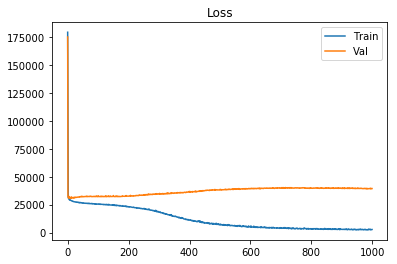

In [40]:
training4 = model4.fit(X_train, Y_train, batch_size=32, epochs=1000, validation_data=(X_val, Y_val))

# Modelisation graphique de la perte et de la precision pendant l'entrainement
plt.figure()
plt.title('Loss')
plt.plot(training4.history['loss'], label='train')
plt.plot(training4.history['val_loss'], label='val')
plt.legend(['Train', 'Val'])
plt.show()

In [42]:
predictions4 = model4.predict(X_test)
ecart4 = Difference(predictions4, Y_test)
print(np.mean(ecart4))
print(np.median(ecart4))

39245.684967180365
28139.734375


## Modèle 5

In [43]:
model5 = Sequential([
    Dense(512, activation='relu', kernel_initializer='normal', input_shape=(275,)),
    Dense(216, kernel_initializer='normal',activation='relu'),
    Dense(216, kernel_initializer='normal',activation='relu'),
    Dense(128, kernel_initializer='normal',activation='relu'),
    Dense(64, kernel_initializer='normal',activation='relu'),
    Dense(8, kernel_initializer='normal',activation='relu',),
    Dense(1, kernel_initializer='normal',activation='linear'),  
])

In [44]:
model5.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])

Train on 2043 samples, validate on 438 samples
Epoch 1/1000
2043/2043 [==============================] - 5s 2ms/step - loss: 174800.6205 - mean_absolute_error: 174800.6562 - val_loss: 119618.9370 - val_mean_absolute_error: 119618.9297
Epoch 2/1000
2043/2043 [==============================] - 2s 784us/step - loss: 40183.8834 - mean_absolute_error: 40183.8828 - val_loss: 31371.9232 - val_mean_absolute_error: 31371.9219
Epoch 3/1000
2043/2043 [==============================] - 2s 843us/step - loss: 30894.3408 - mean_absolute_error: 30894.3379 - val_loss: 30840.2052 - val_mean_absolute_error: 30840.2051
Epoch 4/1000
2043/2043 [==============================] - 2s 804us/step - loss: 29986.9777 - mean_absolute_error: 29986.9805 - val_loss: 30694.9139 - val_mean_absolute_error: 30694.9160
Epoch 5/1000
2043/2043 [==============================] - 2s 797us/step - loss: 29489.6229 - mean_absolute_error: 29489.6270 - val_loss: 31049.1762 - val_mean_absolute_error: 31049.1758
Epoch 6/1000
2043/204

2043/2043 [==============================] - 1s 668us/step - loss: 25516.6757 - mean_absolute_error: 25516.6738 - val_loss: 32190.0698 - val_mean_absolute_error: 32190.0684
Epoch 45/1000
2043/2043 [==============================] - 1s 654us/step - loss: 25843.1241 - mean_absolute_error: 25843.1270 - val_loss: 32309.7153 - val_mean_absolute_error: 32309.7148
Epoch 46/1000
2043/2043 [==============================] - 1s 662us/step - loss: 25318.3647 - mean_absolute_error: 25318.3613 - val_loss: 32345.3082 - val_mean_absolute_error: 32345.3086
Epoch 47/1000
2043/2043 [==============================] - 1s 661us/step - loss: 25472.7060 - mean_absolute_error: 25472.7070 - val_loss: 33109.4069 - val_mean_absolute_error: 33109.4023
Epoch 48/1000
2043/2043 [==============================] - 1s 655us/step - loss: 25373.8955 - mean_absolute_error: 25373.8945 - val_loss: 32497.0346 - val_mean_absolute_error: 32497.0312
Epoch 49/1000
2043/2043 [==============================] - 1s 657us/step - loss

Epoch 88/1000
2043/2043 [==============================] - 1s 659us/step - loss: 19857.7972 - mean_absolute_error: 19857.8008 - val_loss: 33168.7366 - val_mean_absolute_error: 33168.7344
Epoch 89/1000
2043/2043 [==============================] - 1s 650us/step - loss: 19773.6433 - mean_absolute_error: 19773.6406 - val_loss: 35114.3371 - val_mean_absolute_error: 35114.3398
Epoch 90/1000
2043/2043 [==============================] - 1s 648us/step - loss: 20075.2236 - mean_absolute_error: 20075.2266 - val_loss: 33356.5250 - val_mean_absolute_error: 33356.5273
Epoch 91/1000
2043/2043 [==============================] - 1s 647us/step - loss: 19290.7255 - mean_absolute_error: 19290.7227 - val_loss: 35537.5602 - val_mean_absolute_error: 35537.5586
Epoch 92/1000
2043/2043 [==============================] - 1s 651us/step - loss: 19745.4118 - mean_absolute_error: 19745.4160 - val_loss: 33068.8951 - val_mean_absolute_error: 33068.8945
Epoch 93/1000
2043/2043 [==============================] - 1s 647

Epoch 132/1000
2043/2043 [==============================] - 1s 670us/step - loss: 13435.9017 - mean_absolute_error: 13435.9004 - val_loss: 35234.6626 - val_mean_absolute_error: 35234.6602
Epoch 133/1000
2043/2043 [==============================] - 1s 663us/step - loss: 13236.3356 - mean_absolute_error: 13236.3359 - val_loss: 35629.0338 - val_mean_absolute_error: 35629.0352
Epoch 134/1000
2043/2043 [==============================] - 1s 663us/step - loss: 13029.5994 - mean_absolute_error: 13029.6006 - val_loss: 35417.7281 - val_mean_absolute_error: 35417.7305
Epoch 135/1000
2043/2043 [==============================] - 1s 661us/step - loss: 13971.8755 - mean_absolute_error: 13971.8760 - val_loss: 35023.2257 - val_mean_absolute_error: 35023.2227
Epoch 136/1000
2043/2043 [==============================] - 1s 667us/step - loss: 13240.3934 - mean_absolute_error: 13240.3945 - val_loss: 35506.2674 - val_mean_absolute_error: 35506.2656
Epoch 137/1000
2043/2043 [==============================] - 

Epoch 176/1000
2043/2043 [==============================] - 1s 669us/step - loss: 8643.5201 - mean_absolute_error: 8643.5195 - val_loss: 37295.0090 - val_mean_absolute_error: 37295.0078
Epoch 177/1000
2043/2043 [==============================] - 1s 669us/step - loss: 8645.0677 - mean_absolute_error: 8645.0674 - val_loss: 37416.7827 - val_mean_absolute_error: 37416.7812
Epoch 178/1000
2043/2043 [==============================] - 1s 661us/step - loss: 8925.4826 - mean_absolute_error: 8925.4834 - val_loss: 37301.1176 - val_mean_absolute_error: 37301.1211
Epoch 179/1000
2043/2043 [==============================] - 1s 663us/step - loss: 8465.6642 - mean_absolute_error: 8465.6650 - val_loss: 37315.3231 - val_mean_absolute_error: 37315.3242
Epoch 180/1000
2043/2043 [==============================] - 1s 660us/step - loss: 8653.8438 - mean_absolute_error: 8653.8438 - val_loss: 37220.5397 - val_mean_absolute_error: 37220.5430
Epoch 181/1000
2043/2043 [==============================] - 1s 666us/s

2043/2043 [==============================] - 1s 668us/step - loss: 7196.7671 - mean_absolute_error: 7196.7656 - val_loss: 38301.4064 - val_mean_absolute_error: 38301.4062
Epoch 221/1000
2043/2043 [==============================] - 1s 664us/step - loss: 6370.6483 - mean_absolute_error: 6370.6479 - val_loss: 38220.3315 - val_mean_absolute_error: 38220.3281
Epoch 222/1000
2043/2043 [==============================] - 1s 666us/step - loss: 7157.2742 - mean_absolute_error: 7157.2734 - val_loss: 39010.8973 - val_mean_absolute_error: 39010.8984
Epoch 223/1000
2043/2043 [==============================] - 1s 664us/step - loss: 7330.5783 - mean_absolute_error: 7330.5776 - val_loss: 40087.9473 - val_mean_absolute_error: 40087.9453
Epoch 224/1000
2043/2043 [==============================] - 1s 733us/step - loss: 7132.5521 - mean_absolute_error: 7132.5518 - val_loss: 38718.2818 - val_mean_absolute_error: 38718.2812
Epoch 225/1000
2043/2043 [==============================] - 1s 710us/step - loss: 573

2043/2043 [==============================] - 1s 671us/step - loss: 4454.2158 - mean_absolute_error: 4454.2144 - val_loss: 39360.9782 - val_mean_absolute_error: 39360.9766
Epoch 265/1000
2043/2043 [==============================] - 1s 664us/step - loss: 5009.9149 - mean_absolute_error: 5009.9155 - val_loss: 39372.5838 - val_mean_absolute_error: 39372.5781
Epoch 266/1000
2043/2043 [==============================] - 1s 672us/step - loss: 4804.5842 - mean_absolute_error: 4804.5845 - val_loss: 39265.6983 - val_mean_absolute_error: 39265.6992
Epoch 267/1000
2043/2043 [==============================] - 1s 665us/step - loss: 4409.5996 - mean_absolute_error: 4409.5986 - val_loss: 39774.2834 - val_mean_absolute_error: 39774.2891
Epoch 268/1000
2043/2043 [==============================] - 1s 692us/step - loss: 4940.9410 - mean_absolute_error: 4940.9424 - val_loss: 39548.7098 - val_mean_absolute_error: 39548.7070
Epoch 269/1000
2043/2043 [==============================] - 2s 786us/step - loss: 488

2043/2043 [==============================] - 1s 670us/step - loss: 3828.4638 - mean_absolute_error: 3828.4634 - val_loss: 39580.7208 - val_mean_absolute_error: 39580.7227
Epoch 309/1000
2043/2043 [==============================] - 1s 666us/step - loss: 3915.3909 - mean_absolute_error: 3915.3914 - val_loss: 39903.5862 - val_mean_absolute_error: 39903.5859
Epoch 310/1000
2043/2043 [==============================] - 2s 752us/step - loss: 4128.0880 - mean_absolute_error: 4128.0884 - val_loss: 39754.6215 - val_mean_absolute_error: 39754.6211
Epoch 311/1000
2043/2043 [==============================] - 1s 696us/step - loss: 3979.1293 - mean_absolute_error: 3979.1287 - val_loss: 39323.9503 - val_mean_absolute_error: 39323.9492
Epoch 312/1000
2043/2043 [==============================] - 1s 696us/step - loss: 4030.1835 - mean_absolute_error: 4030.1838 - val_loss: 39604.1850 - val_mean_absolute_error: 39604.1875
Epoch 313/1000
2043/2043 [==============================] - 1s 672us/step - loss: 375

2043/2043 [==============================] - 1s 672us/step - loss: 3456.8448 - mean_absolute_error: 3456.8445 - val_loss: 39490.8271 - val_mean_absolute_error: 39490.8320
Epoch 353/1000
2043/2043 [==============================] - 1s 665us/step - loss: 3427.9748 - mean_absolute_error: 3427.9756 - val_loss: 39647.7973 - val_mean_absolute_error: 39647.8008
Epoch 354/1000
2043/2043 [==============================] - 1s 676us/step - loss: 3416.7459 - mean_absolute_error: 3416.7458 - val_loss: 39371.0321 - val_mean_absolute_error: 39371.0312
Epoch 355/1000
2043/2043 [==============================] - 1s 679us/step - loss: 3485.1792 - mean_absolute_error: 3485.1792 - val_loss: 40074.1884 - val_mean_absolute_error: 40074.1875
Epoch 356/1000
2043/2043 [==============================] - 1s 674us/step - loss: 3311.7615 - mean_absolute_error: 3311.7620 - val_loss: 39963.1188 - val_mean_absolute_error: 39963.1172
Epoch 357/1000
2043/2043 [==============================] - 1s 678us/step - loss: 303

2043/2043 [==============================] - 2s 854us/step - loss: 2990.9509 - mean_absolute_error: 2990.9512 - val_loss: 39203.0699 - val_mean_absolute_error: 39203.0703
Epoch 397/1000
2043/2043 [==============================] - 2s 743us/step - loss: 3682.0372 - mean_absolute_error: 3682.0366 - val_loss: 39160.0597 - val_mean_absolute_error: 39160.0547
Epoch 398/1000
2043/2043 [==============================] - 2s 765us/step - loss: 3295.8990 - mean_absolute_error: 3295.8997 - val_loss: 39288.8828 - val_mean_absolute_error: 39288.8867
Epoch 399/1000
2043/2043 [==============================] - 2s 800us/step - loss: 3659.9362 - mean_absolute_error: 3659.9360 - val_loss: 39484.9058 - val_mean_absolute_error: 39484.9023
Epoch 400/1000
2043/2043 [==============================] - 1s 707us/step - loss: 3142.7987 - mean_absolute_error: 3142.7988 - val_loss: 39891.7369 - val_mean_absolute_error: 39891.7344
Epoch 401/1000
2043/2043 [==============================] - 2s 790us/step - loss: 343

2043/2043 [==============================] - 1s 678us/step - loss: 2892.8512 - mean_absolute_error: 2892.8516 - val_loss: 39101.4343 - val_mean_absolute_error: 39101.4336
Epoch 441/1000
2043/2043 [==============================] - 1s 673us/step - loss: 3020.9925 - mean_absolute_error: 3020.9924 - val_loss: 39145.9235 - val_mean_absolute_error: 39145.9258
Epoch 442/1000
2043/2043 [==============================] - 2s 744us/step - loss: 2993.6525 - mean_absolute_error: 2993.6528 - val_loss: 39272.1723 - val_mean_absolute_error: 39272.1680
Epoch 443/1000
2043/2043 [==============================] - 2s 753us/step - loss: 2860.8994 - mean_absolute_error: 2860.9001 - val_loss: 39352.9417 - val_mean_absolute_error: 39352.9453
Epoch 444/1000
2043/2043 [==============================] - 1s 677us/step - loss: 2568.1739 - mean_absolute_error: 2568.1741 - val_loss: 39292.6382 - val_mean_absolute_error: 39292.6328
Epoch 445/1000
2043/2043 [==============================] - 1s 674us/step - loss: 276

2043/2043 [==============================] - 1s 686us/step - loss: 2665.6239 - mean_absolute_error: 2665.6243 - val_loss: 39120.5259 - val_mean_absolute_error: 39120.5234
Epoch 485/1000
2043/2043 [==============================] - 1s 667us/step - loss: 2803.8514 - mean_absolute_error: 2803.8506 - val_loss: 38961.7888 - val_mean_absolute_error: 38961.7891
Epoch 486/1000
2043/2043 [==============================] - 1s 667us/step - loss: 2898.6499 - mean_absolute_error: 2898.6492 - val_loss: 38857.4522 - val_mean_absolute_error: 38857.4570
Epoch 487/1000
2043/2043 [==============================] - 1s 670us/step - loss: 3528.4380 - mean_absolute_error: 3528.4380 - val_loss: 39014.1343 - val_mean_absolute_error: 39014.1367
Epoch 488/1000
2043/2043 [==============================] - 1s 672us/step - loss: 2610.9324 - mean_absolute_error: 2610.9324 - val_loss: 38892.6188 - val_mean_absolute_error: 38892.6172
Epoch 489/1000
2043/2043 [==============================] - 1s 667us/step - loss: 267

2043/2043 [==============================] - 1s 669us/step - loss: 2716.4639 - mean_absolute_error: 2716.4636 - val_loss: 39363.4347 - val_mean_absolute_error: 39363.4336
Epoch 529/1000
2043/2043 [==============================] - 1s 663us/step - loss: 3553.9975 - mean_absolute_error: 3553.9976 - val_loss: 38805.5657 - val_mean_absolute_error: 38805.5664
Epoch 530/1000
2043/2043 [==============================] - 1s 670us/step - loss: 2763.8644 - mean_absolute_error: 2763.8650 - val_loss: 39046.1226 - val_mean_absolute_error: 39046.1172
Epoch 531/1000
2043/2043 [==============================] - 1s 664us/step - loss: 2656.4241 - mean_absolute_error: 2656.4241 - val_loss: 39042.6662 - val_mean_absolute_error: 39042.6680
Epoch 532/1000
2043/2043 [==============================] - 1s 667us/step - loss: 3057.9570 - mean_absolute_error: 3057.9570 - val_loss: 39189.7514 - val_mean_absolute_error: 39189.7539
Epoch 533/1000
2043/2043 [==============================] - 1s 667us/step - loss: 260

2043/2043 [==============================] - 1s 676us/step - loss: 2594.3722 - mean_absolute_error: 2594.3723 - val_loss: 38742.5308 - val_mean_absolute_error: 38742.5312
Epoch 573/1000
2043/2043 [==============================] - 1s 664us/step - loss: 2769.3449 - mean_absolute_error: 2769.3450 - val_loss: 38214.8214 - val_mean_absolute_error: 38214.8164
Epoch 574/1000
2043/2043 [==============================] - 2s 921us/step - loss: 2793.8652 - mean_absolute_error: 2793.8655 - val_loss: 38758.8791 - val_mean_absolute_error: 38758.8750
Epoch 575/1000
2043/2043 [==============================] - 1s 653us/step - loss: 2372.2294 - mean_absolute_error: 2372.2290 - val_loss: 38376.6014 - val_mean_absolute_error: 38376.6016
Epoch 576/1000
2043/2043 [==============================] - 1s 649us/step - loss: 2855.5837 - mean_absolute_error: 2855.5835 - val_loss: 38667.6575 - val_mean_absolute_error: 38667.6562
Epoch 577/1000
2043/2043 [==============================] - 1s 633us/step - loss: 272

2043/2043 [==============================] - 1s 672us/step - loss: 2326.3400 - mean_absolute_error: 2326.3396 - val_loss: 38527.1789 - val_mean_absolute_error: 38527.1797
Epoch 617/1000
2043/2043 [==============================] - 1s 690us/step - loss: 2282.5603 - mean_absolute_error: 2282.5603 - val_loss: 38371.2275 - val_mean_absolute_error: 38371.2266
Epoch 618/1000
2043/2043 [==============================] - 1s 673us/step - loss: 2153.5335 - mean_absolute_error: 2153.5330 - val_loss: 38691.2953 - val_mean_absolute_error: 38691.2969
Epoch 619/1000
2043/2043 [==============================] - 1s 687us/step - loss: 2401.9721 - mean_absolute_error: 2401.9724 - val_loss: 38569.1837 - val_mean_absolute_error: 38569.1797
Epoch 620/1000
2043/2043 [==============================] - 1s 705us/step - loss: 2363.8527 - mean_absolute_error: 2363.8530 - val_loss: 38391.4771 - val_mean_absolute_error: 38391.4805
Epoch 621/1000
2043/2043 [==============================] - 1s 694us/step - loss: 228

2043/2043 [==============================] - 1s 667us/step - loss: 2710.6274 - mean_absolute_error: 2710.6272 - val_loss: 38044.2117 - val_mean_absolute_error: 38044.2070
Epoch 661/1000
2043/2043 [==============================] - 1s 663us/step - loss: 2396.2748 - mean_absolute_error: 2396.2749 - val_loss: 38112.8812 - val_mean_absolute_error: 38112.8828
Epoch 662/1000
2043/2043 [==============================] - 1s 674us/step - loss: 2204.4186 - mean_absolute_error: 2204.4187 - val_loss: 38619.3738 - val_mean_absolute_error: 38619.3789
Epoch 663/1000
2043/2043 [==============================] - 1s 679us/step - loss: 2460.0285 - mean_absolute_error: 2460.0288 - val_loss: 38182.5772 - val_mean_absolute_error: 38182.5781
Epoch 664/1000
2043/2043 [==============================] - 1s 662us/step - loss: 2171.1682 - mean_absolute_error: 2171.1682 - val_loss: 37941.2395 - val_mean_absolute_error: 37941.2383
Epoch 665/1000
2043/2043 [==============================] - 1s 667us/step - loss: 249

2043/2043 [==============================] - 1s 668us/step - loss: 2110.3877 - mean_absolute_error: 2110.3877 - val_loss: 38043.8062 - val_mean_absolute_error: 38043.8047
Epoch 705/1000
2043/2043 [==============================] - 1s 669us/step - loss: 2295.9466 - mean_absolute_error: 2295.9465 - val_loss: 37975.0455 - val_mean_absolute_error: 37975.0469
Epoch 706/1000
2043/2043 [==============================] - 1s 673us/step - loss: 2512.5858 - mean_absolute_error: 2512.5859 - val_loss: 38485.7403 - val_mean_absolute_error: 38485.7383
Epoch 707/1000
2043/2043 [==============================] - 1s 666us/step - loss: 2270.0648 - mean_absolute_error: 2270.0642 - val_loss: 38313.0581 - val_mean_absolute_error: 38313.0586
Epoch 708/1000
2043/2043 [==============================] - 1s 673us/step - loss: 2537.8613 - mean_absolute_error: 2537.8616 - val_loss: 38380.6867 - val_mean_absolute_error: 38380.6836
Epoch 709/1000
2043/2043 [==============================] - 1s 665us/step - loss: 241

2043/2043 [==============================] - 1s 673us/step - loss: 2311.8207 - mean_absolute_error: 2311.8208 - val_loss: 37950.4214 - val_mean_absolute_error: 37950.4180
Epoch 749/1000
2043/2043 [==============================] - 1s 669us/step - loss: 2124.8477 - mean_absolute_error: 2124.8479 - val_loss: 38189.9486 - val_mean_absolute_error: 38189.9492
Epoch 750/1000
2043/2043 [==============================] - 1s 662us/step - loss: 2459.5258 - mean_absolute_error: 2459.5259 - val_loss: 38191.3502 - val_mean_absolute_error: 38191.3477
Epoch 751/1000
2043/2043 [==============================] - 1s 662us/step - loss: 2839.9176 - mean_absolute_error: 2839.9167 - val_loss: 37898.3479 - val_mean_absolute_error: 37898.3477
Epoch 752/1000
2043/2043 [==============================] - 1s 669us/step - loss: 2331.4785 - mean_absolute_error: 2331.4788 - val_loss: 37869.1714 - val_mean_absolute_error: 37869.1680
Epoch 753/1000
2043/2043 [==============================] - 1s 675us/step - loss: 223

2043/2043 [==============================] - 1s 686us/step - loss: 2114.6587 - mean_absolute_error: 2114.6584 - val_loss: 38321.2709 - val_mean_absolute_error: 38321.2695
Epoch 793/1000
2043/2043 [==============================] - 1s 672us/step - loss: 2488.6517 - mean_absolute_error: 2488.6521 - val_loss: 38570.1053 - val_mean_absolute_error: 38570.1055
Epoch 794/1000
2043/2043 [==============================] - 1s 683us/step - loss: 2427.6779 - mean_absolute_error: 2427.6785 - val_loss: 37686.8577 - val_mean_absolute_error: 37686.8594
Epoch 795/1000
2043/2043 [==============================] - 1s 669us/step - loss: 2232.7135 - mean_absolute_error: 2232.7131 - val_loss: 38025.6155 - val_mean_absolute_error: 38025.6172
Epoch 796/1000
2043/2043 [==============================] - 1s 675us/step - loss: 2048.7308 - mean_absolute_error: 2048.7305 - val_loss: 38036.6656 - val_mean_absolute_error: 38036.6602
Epoch 797/1000
2043/2043 [==============================] - 1s 670us/step - loss: 212

2043/2043 [==============================] - 1s 675us/step - loss: 2196.7720 - mean_absolute_error: 2196.7720 - val_loss: 38089.7719 - val_mean_absolute_error: 38089.7734
Epoch 837/1000
2043/2043 [==============================] - 1s 708us/step - loss: 2099.5309 - mean_absolute_error: 2099.5310 - val_loss: 37819.5981 - val_mean_absolute_error: 37819.5977
Epoch 838/1000
2043/2043 [==============================] - 1s 685us/step - loss: 1855.9322 - mean_absolute_error: 1855.9321 - val_loss: 37746.5547 - val_mean_absolute_error: 37746.5586
Epoch 839/1000
2043/2043 [==============================] - 1s 679us/step - loss: 2047.4563 - mean_absolute_error: 2047.4563 - val_loss: 38114.7516 - val_mean_absolute_error: 38114.7539
Epoch 840/1000
2043/2043 [==============================] - 1s 662us/step - loss: 2019.2867 - mean_absolute_error: 2019.2867 - val_loss: 37902.3167 - val_mean_absolute_error: 37902.3164
Epoch 841/1000
2043/2043 [==============================] - 1s 670us/step - loss: 192

2043/2043 [==============================] - 1s 673us/step - loss: 2013.4304 - mean_absolute_error: 2013.4303 - val_loss: 37753.0055 - val_mean_absolute_error: 37753.0078
Epoch 881/1000
2043/2043 [==============================] - 1s 667us/step - loss: 1866.9843 - mean_absolute_error: 1866.9843 - val_loss: 37486.0587 - val_mean_absolute_error: 37486.0586
Epoch 882/1000
2043/2043 [==============================] - 1s 675us/step - loss: 2105.8057 - mean_absolute_error: 2105.8052 - val_loss: 37944.2402 - val_mean_absolute_error: 37944.2422
Epoch 883/1000
2043/2043 [==============================] - 1s 667us/step - loss: 2008.0929 - mean_absolute_error: 2008.0928 - val_loss: 37740.1402 - val_mean_absolute_error: 37740.1406
Epoch 884/1000
2043/2043 [==============================] - 1s 674us/step - loss: 1909.3204 - mean_absolute_error: 1909.3203 - val_loss: 37530.9771 - val_mean_absolute_error: 37530.9766
Epoch 885/1000
2043/2043 [==============================] - 1s 672us/step - loss: 202

2043/2043 [==============================] - 1s 725us/step - loss: 1976.0145 - mean_absolute_error: 1976.0146 - val_loss: 37611.8753 - val_mean_absolute_error: 37611.8750
Epoch 925/1000
2043/2043 [==============================] - 1s 679us/step - loss: 2273.8236 - mean_absolute_error: 2273.8237 - val_loss: 37435.1104 - val_mean_absolute_error: 37435.1133
Epoch 926/1000
2043/2043 [==============================] - 1s 670us/step - loss: 2279.7323 - mean_absolute_error: 2279.7319 - val_loss: 37765.7994 - val_mean_absolute_error: 37765.8008
Epoch 927/1000
2043/2043 [==============================] - 1s 673us/step - loss: 1931.2658 - mean_absolute_error: 1931.2657 - val_loss: 37562.8378 - val_mean_absolute_error: 37562.8398
Epoch 928/1000
2043/2043 [==============================] - 1s 673us/step - loss: 2215.9223 - mean_absolute_error: 2215.9226 - val_loss: 37541.7802 - val_mean_absolute_error: 37541.7812
Epoch 929/1000
2043/2043 [==============================] - 2s 747us/step - loss: 247

2043/2043 [==============================] - 2s 775us/step - loss: 2019.3752 - mean_absolute_error: 2019.3749 - val_loss: 37500.8741 - val_mean_absolute_error: 37500.8750
Epoch 969/1000
2043/2043 [==============================] - 1s 703us/step - loss: 1989.1594 - mean_absolute_error: 1989.1593 - val_loss: 37694.9782 - val_mean_absolute_error: 37694.9805
Epoch 970/1000
2043/2043 [==============================] - 2s 814us/step - loss: 2228.3088 - mean_absolute_error: 2228.3091 - val_loss: 37725.8747 - val_mean_absolute_error: 37725.8750
Epoch 971/1000
2043/2043 [==============================] - 2s 770us/step - loss: 1822.1502 - mean_absolute_error: 1822.1504 - val_loss: 37903.7702 - val_mean_absolute_error: 37903.7656
Epoch 972/1000
2043/2043 [==============================] - 2s 791us/step - loss: 1862.8642 - mean_absolute_error: 1862.8636 - val_loss: 37553.3962 - val_mean_absolute_error: 37553.3984
Epoch 973/1000
2043/2043 [==============================] - 2s 750us/step - loss: 201

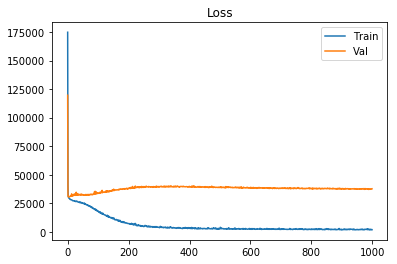

In [45]:
training5 = model5.fit(X_train, Y_train, batch_size=32, epochs=1000, validation_data=(X_val, Y_val))

# Modelisation graphique de la perte et de la precision pendant l'entrainement
plt.figure()
plt.title('Loss')
plt.plot(training5.history['loss'], label='train')
plt.plot(training5.history['val_loss'], label='val')
plt.legend(['Train', 'Val'])
plt.show()

In [46]:
predictions5 = model5.predict(X_test)

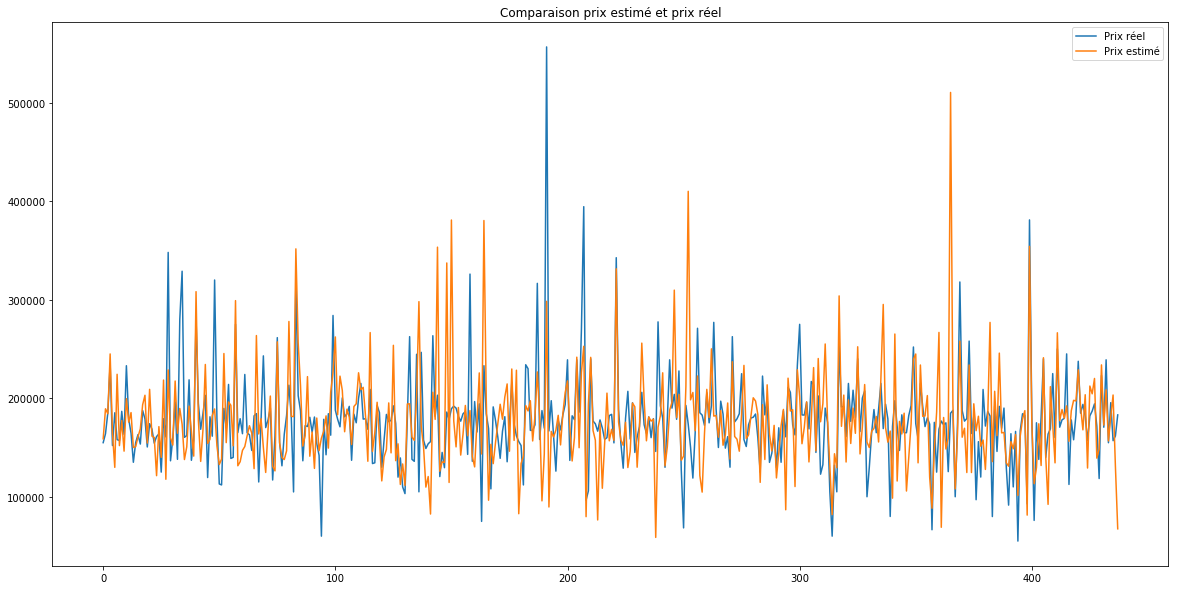

In [47]:
plt.figure(figsize=(20, 10))
plt.title('Comparaison prix estimé et prix réel')
plt.plot(Y_test, label='Prix réel')
plt.plot(predictions5, label='Prix estimé')
plt.legend(['Prix réel', 'Prix estimé'])
plt.show()

In [48]:
ecart5 = Difference(predictions5, Y_test)
print(np.mean(ecart5))
print(np.median(ecart5))

33625.010577197485
23801.265625


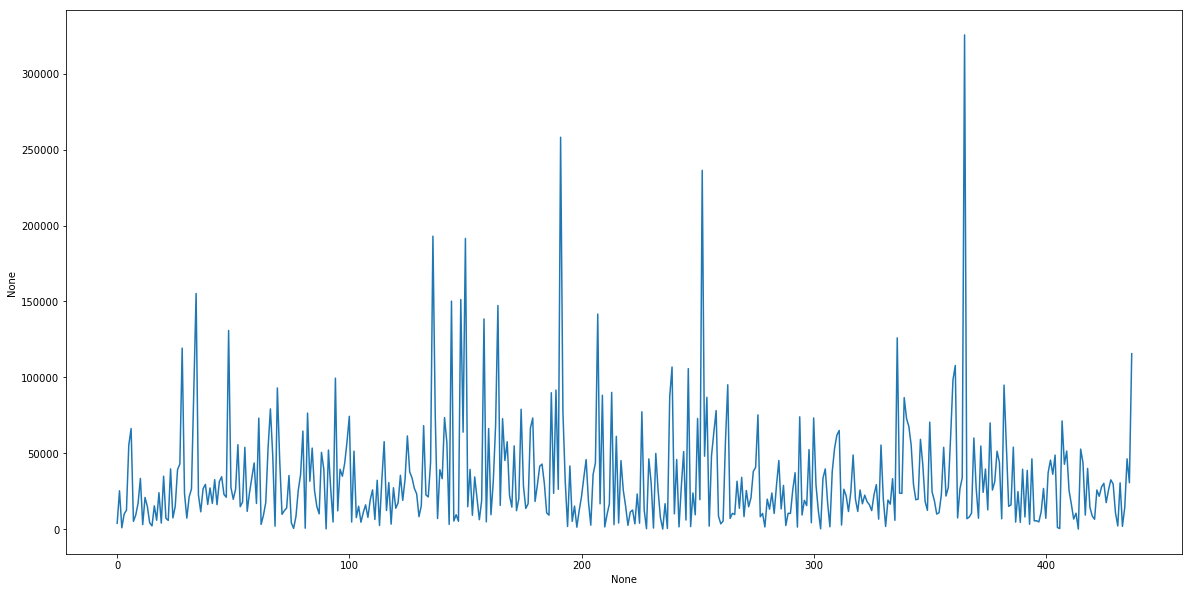

In [50]:
abscisse=[i for i in range(len(Y_test))]
plt.figure(figsize=(20,10))
sns.lineplot(x=abscisse, y=ecart5)

Finalement, avec le modèle 3, on obtient en moyenne et en médiane les écarts les moins importants entre la prédiction et les données de test. Cependant, c'est probablement lié au fait que le modèle 3 échoue à prédire des prix élevés, ce qui n'est pas le cas des modèles 4 et 5. Ces deux derniers modèles semblent plus proches de la réalité sur les courbes qui comparent la prédiction et le prix réel pour chaque maison. Notamment, les prix plus élevés sont mieux prédits. Les écarts moyens que l'on obtient sont acceptables, dans la mesure où les acheteurs ont souvent une fourchette de prix dans laquelle ils estiment être en mesure d'acheter. Il y a encore des points d'améliorations, il doit certainement être possible d'avoir plus de précision. On verra dans le notebook suivant qu'on obtient un résultat intéressant en sélectionnant seulement certaines features.